## EXPLORACION DE LOS DATOS

In [2]:
# Importacion de Numpy
import numpy as np

# Importacion de Pandas
import pandas as pd

# Importacion de Matplotlib y Seaborn
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib import rcParams
import seaborn as sb

# Importacion DateTime
from datetime import datetime
from datetime import timedelta

In [3]:
def concat_conagua_month_(base_station, start_year, end_year, export_file = True):
    """
    Parametros
    ----------
    Entrada
        base_station : string
            Nombre de la estacion climatologica
        start_year  : int
            Año inicial
        end year : int
            Año Final
        export_file : boolean
            True  -> guardar archivo en ../output/exploration/
            False -> se despliega en consola los datos preparados
    ----------
    Salida
        conagua_df : dataframe
            Dataframe que contempla todo el conjunto de datos conagua
    """
    # Lectura de los datos conagua desde archivos CSV preparados para ETo
    month_tuple = ('enero','febrero','marzo','abril','mayo','junio','julio','agosto','septiembre','octubre','noviembre','diciembre')
    
    # Declaracion de lista para recibir todos los datos mensuales preparados
    conagua_extended = []

    # Ciclo for para concatenar los archivos preparados conagua mensuales disponibles 
    for year in range(start_year, end_year+1):
        for month in month_tuple:
            conagua_extended.append(pd.read_csv('../output/preparation/conagua_{}_{}_req_for_eto.csv'.format(year,month)))

    #Concatenación de los elementos de la lista conagua_extended a un dataframe
    conagua_df = pd.concat(conagua_extended)
    conagua_df['date'] = pd.to_datetime(conagua_df['date'])

    # print(conagua_extended)
    # display(conagua_df.info())
    # display(conagua_df.dtypes)
    
    # Guardado del Archivo en formato CSV
    if(export_file == True):
        conagua_df.to_csv('../output/exploration/conagua_'+base_station+'_'+str(start_year)+'_'+str(end_year)+'.csv')
    # Si no se requiere guardado, se visualiza el reordenamiento de datos para ETo
    elif(export_file == False):
        display("Datos Conagua %s-%s preparados para ETo" %(start_year,end_year))
        #display("Paso >> Guardado/Visualización datos preparados ETo >> conagua_df")
        display(conagua_df)
        #display("Paso >> Guardado/Visualización datos preparados ETo >> conagua_df.info()")
        #display(conagua_df.info())
        #display("Paso >> Guardado/Visualización datos preparados ETo >> conagua_df.isnull().sum()")
        #display(conagua_df.isnull().sum())

    return conagua_df

In [4]:
def conagua_average_month_graph(conagua_df, export_image = True):
    """
    Parametros
    ----------
    Entrada
        conagua_df : dataframe
            Dataframe que contempla todo el conjunto de datos conagua

        export_image : boolean
            True  -> guardar archivo en ../output/exploration/
            False -> se despliega grafico de los datos promediados mensualmente
    ----------
    Salida
        0 : int
    """
    # Calculo mensual promedio de cada columna/variable en dataframe conagua
    conagua_date_df = conagua_df.set_index('date')
    conagua_month_mean_df = conagua_date_df.resample('M').mean()
    conagua_month_mean_df[conagua_month_mean_df.columns] = conagua_month_mean_df[conagua_month_mean_df.columns].round(1)

    #display(conagua_month_mean_df)

    # Grafico lineplot de seaborn, ajuste de tamano, datos en eje x,y
    fig, ax = plt.subplots(figsize = (15, 7), dpi = 200)
    lineplt = sb.lineplot(ax = ax, x='date', y='RH_max', color= 'green', label='hum max', data=conagua_month_mean_df)
    lineplt = sb.lineplot(ax = ax, x='date', y='RH_min', color= 'lime', label='hum min', data=conagua_month_mean_df)
    lineplt = sb.lineplot(ax = ax, x='date', y='T_max', color= 'gold', label='temp max', data=conagua_month_mean_df)
    lineplt = sb.lineplot(ax = ax, x='date', y='T_min', color= 'khaki', label='temp min', data=conagua_month_mean_df)
    lineplt = sb.lineplot(ax = ax, x='date', y='n_sun', color= 'red', label='hr sol', data=conagua_month_mean_df)
    lineplt = sb.lineplot(ax = ax, x='date', y='R_s', color= 'coral', label='rad sol', data=conagua_month_mean_df)
    lineplt = sb.lineplot(ax = ax, x='date', y='U_z', color= 'blue', label='vel viento', data=conagua_month_mean_df)
    lineplt = sb.lineplot(ax = ax, x='date', y='rain_mm', color= 'aqua', label='lluvia', data=conagua_month_mean_df)

    # Etiquetas dentro del grafico
    lineplt.set_title('Conagua Promedio Mensual')
    plt.xlabel('Tiempo')
    plt.ylabel('Variables Climatologicas')

    # Major ticks mensual
    fmt_month = md.MonthLocator(interval=1)
    ax.xaxis.set_major_locator(fmt_month)

    # Especificamos formato de tiempo 'year-month-day'
    ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m'))

    # Rotar 90° la etiquetas de fecha para improvisar espacio
    plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)

    # Impresion de legendas fuera de la zona de graficacion
    plt.legend(loc='best',bbox_to_anchor=(1.01, 1.0))

    # Exportar grafico como imagen
    if (export_image == True):
        # Captura del tiempo actual
        now = datetime.now()
        dt_string = now.strftime("%d%m%Y_%H%M")
        plt.savefig( fname = '../output/exploration/conagua_average_month_graph_'+dt_string+'.jpg')
    else:
        # Mostrar grafico
        plt.show()

    return 0

In [5]:
def crop_season_humidity_graph(conagua_df, trans_day, crop_days_stage, upper_limit = 90, lower_limit = 40, export_image = True):
    """
    Parametros
    ----------
    Entrada
        conagua_df : dataframe
            Dataframe que contempla todo el conjunto de datos conagua
        trans_day,  : date
            Dia de transplante
        crop_days_stage : dict
            Diccionario que describe los dias para cada etapa del cultivo
        upper_limit,  : int
            limite superior [default = 90]
        lower_limit : int
            limite inferior [default = 40]
        export_image : boolean
            True  -> guardar archivo en ../output/exploration/ [default]
            False -> se despliega grafico de los datos promediados mensualmente
    ----------
    Salida
        0 : int
    """
    # Asignacion de fecha inicial/final respecto a las etapas del cultivo
    init_start_date = trans_day 
    dev_start_date = transplant_day + timedelta(days=crop_days_stage['initial'])
    mid_season_start_date = transplant_day + timedelta(days=crop_days_stage['initial']+crop_days_stage['development'])
    late_season_start_date = transplant_day + timedelta(days=crop_days_stage['initial']+crop_days_stage['development']+crop_days_stage['mid_season'])
    late_season_end_date = transplant_day + timedelta(days=crop_days_stage['initial']+crop_days_stage['development']+crop_days_stage['mid_season']+crop_days_stage['late_season'])

    # Dias totales del cultivo
    total_days_timerange = crop_days_stage['initial']+crop_days_stage['development']+crop_days_stage['mid_season']+crop_days_stage['late_season']
    
    # Mascara que permitira acotar conagua_df entre dia de transplante y el dia final del cultivo para efecto de visualizacion
    mask = (conagua_df['date'] > transplant_day) & (conagua_df['date'] <= transplant_day+timedelta(days=total_days_timerange))
    conagua_df = conagua_df.loc[mask]

    # Activamos estilo de seaborn
    sb.set_style("ticks")
    
    # Grafico lineplot de seaborn, ajuste de tamano, datos en eje x,y
    fig, ax = plt.subplots(figsize = (15, 7), dpi = 200)
    lineplt = sb.lineplot(ax = ax, x='date', y='RH_max', color= 'green', label='hum max', data=conagua_df)
    lineplt = sb.lineplot(ax = ax, x='date', y='RH_min', color= 'lime', label='hum min', data=conagua_df)

    # Etiquetas dentro del grafico
    lineplt.set_title('Humedad Relativa - Etapas Cultivo')
    plt.xlabel('Tiempo Cultivo')
    plt.ylabel('Humedad (%)')

    # Major ticks cada decena
    fmt_decade = md.DayLocator(interval=10)
    ax.xaxis.set_major_locator(fmt_decade)

    # Minor ticks cada dia
    fmt_day = md.DayLocator(interval=1)
    ax.xaxis.set_minor_locator(fmt_day)

    # Especificamos formato de tiempo 'year-month-day'
    ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))

    # Rotar 90° la etiquetas de fecha para improvisar espacio
    plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)

    # Limites maximo y minimo de la variable sobre eje horizontal
    ax.hlines(y=upper_limit, xmin=init_start_date, xmax=late_season_end_date, color='purple', label='lim max', linestyles='dashed')
    ax.hlines(y=lower_limit, xmin=init_start_date, xmax=late_season_end_date, color='plum', label='lim min', linestyles='dashed')

    # Inicio/Fin de las etapas de cultivo sobre eje vertical
    ax.vlines([init_start_date], ymin = 0, ymax = 100,  label='et inicial', color='gainsboro', linestyles='dashed')
    ax.vlines([dev_start_date], ymin = 0, ymax = 100, label='et des', color='lightgray', linestyles='dashed')
    ax.vlines([mid_season_start_date], ymin = 0, ymax = 100,  label='et med', color='darkgray', linestyles='dashed')
    ax.vlines([late_season_start_date], ymin = 0, ymax = 100, label='et tard', color='gray', linestyles='dashed')
    ax.vlines([late_season_end_date], ymin = 0, ymax = 100,  color='dimgray', linestyles='dashed')
    
    # Impresion de legendas fuera de la zona de graficacion
    plt.legend(loc='best',bbox_to_anchor=(1.01, 1.0))

    # Exportar grafico como imagen
    if (export_image == True):
        # Captura del tiempo actual
        now = datetime.now()
        dt_string = now.strftime("%d%m%Y_%H%M")
        plt.savefig( fname = '../output/exploration/crop_season_humidity_graph_'+dt_string+'.png')
    else:
        # Mostrar grafico
        plt.show()

    return 0

In [6]:
def crop_season_temperature_graph(conagua_df, trans_day, crop_days_stage, upper_limit = 25, lower_limit = 8, export_image = True):
    """
    Parametros
    ----------
    Entrada
        conagua_df : dataframe
            Dataframe que contempla todo el conjunto de datos conagua
        trans_day,  : date
            Dia de transplante
        crop_days_stage : dict
            Diccionario que describe los dias para cada etapa del cultivo
        upper_limit,  : int
            limite superior [default = 25]
        lower_limit : int
            limite inferior [default = 8]
        export_image : boolean
            True  -> guardar archivo en ../output/exploration/ [default]
            False -> se despliega grafico de los datos promediados mensualmente
    ----------
    Salida
        0 : int
    """
    # Asignacion de fecha inicial/final respecto a las etapas del cultivo
    init_start_date = trans_day 
    dev_start_date = transplant_day + timedelta(days=crop_days_stage['initial'])
    mid_season_start_date = transplant_day + timedelta(days=crop_days_stage['initial']+crop_days_stage['development'])
    late_season_start_date = transplant_day + timedelta(days=crop_days_stage['initial']+crop_days_stage['development']+crop_days_stage['mid_season'])
    late_season_end_date = transplant_day + timedelta(days=crop_days_stage['initial']+crop_days_stage['development']+crop_days_stage['mid_season']+crop_days_stage['late_season'])

    # Dias totales del cultivo
    total_days_timerange = crop_days_stage['initial']+crop_days_stage['development']+crop_days_stage['mid_season']+crop_days_stage['late_season']
    
    # Mascara que permitira acotar conagua_df entre dia de transplante y el dia final del cultivo para efecto de visualizacion
    mask = (conagua_df['date'] > transplant_day) & (conagua_df['date'] <= transplant_day+timedelta(days=total_days_timerange))
    conagua_df = conagua_df.loc[mask]

    # Buscamos maximo y minimo para efecto de graficacion en eje y
    max_temp = conagua_df['T_max'].max()
    min_temp = conagua_df['T_min'].min()

    # Activamos estilo de seaborn
    sb.set_style("ticks")
    
    # Grafico lineplot de seaborn, ajuste de tamano, datos en eje x,y
    fig, ax = plt.subplots(figsize = (15, 7), dpi = 200)
    lineplt = sb.lineplot(ax = ax, x='date', y='T_max', color= 'gold', label='temp max', data=conagua_df)
    lineplt = sb.lineplot(ax = ax, x='date', y='T_min', color= 'khaki', label='temp min', data=conagua_df)

    # Etiquetas dentro del grafico
    lineplt.set_title('Temperatura - Etapas Cultivo')
    plt.xlabel('Tiempo Cultivo')
    plt.ylabel('Temperatura (°C)')

    # Major ticks cada decena
    fmt_decade = md.DayLocator(interval=10)
    ax.xaxis.set_major_locator(fmt_decade)

    # Minor ticks cada dia
    fmt_day = md.DayLocator(interval=1)
    ax.xaxis.set_minor_locator(fmt_day)

    # Especificamos formato de tiempo 'year-month-day'
    ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))

    # Rotar 90° la etiquetas de fecha para improvisar espacio
    plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)

    # Limites maximo y minimo de la variable sobre eje horizontal
    ax.hlines(y=upper_limit, xmin=init_start_date, xmax=late_season_end_date, color='purple', label='lim sup', linestyles='dashed')
    ax.hlines(y=lower_limit, xmin=init_start_date, xmax=late_season_end_date, color='plum', label='lim inf', linestyles='dashed')

    # Inicio/Fin de las etapas de cultivo sobre eje vertical
    ax.vlines([init_start_date], ymin = min_temp, ymax = max_temp,  label='et inicial', color='gainsboro', linestyles='dashed')
    ax.vlines([dev_start_date], ymin = min_temp, ymax = max_temp, label='et des', color='lightgray', linestyles='dashed')
    ax.vlines([mid_season_start_date], ymin = min_temp, ymax = max_temp,  label='et med', color='darkgray', linestyles='dashed')
    ax.vlines([late_season_start_date], ymin = min_temp, ymax = max_temp, label='et tard', color='gray', linestyles='dashed')
    ax.vlines([late_season_end_date], ymin = min_temp, ymax = max_temp,  color='dimgray', linestyles='dashed')
    
    # Impresion de legendas fuera de la zona de graficacion
    plt.legend(loc='best',bbox_to_anchor=(1.01, 1.0))

    # Exportar grafico como imagen
    if (export_image == True):
        # Captura del tiempo actual
        now = datetime.now()
        dt_string = now.strftime("%d%m%Y_%H%M")
        plt.savefig( fname = '../output/exploration/crop_season_temperature_graph_'+dt_string+'.png')
    else:
        # Mostrar grafico
        plt.show()

    return 0

In [7]:
def crop_season_solar_graph(conagua_df, trans_day, crop_days_stage, export_image = True):
    """
    Parametros
    ----------
    Entrada
        conagua_df : dataframe
            Dataframe que contempla todo el conjunto de datos conagua
        trans_day,  : date
            Dia de transplante
        crop_days_stage : dict
            Diccionario que describe los dias para cada etapa del cultivo
        export_image : boolean
            True  -> guardar archivo en ../output/exploration/ [default]
            False -> se despliega grafico de los datos promediados mensualmente
    ----------
    Salida
        0 : int
    """
    # Asignacion de fecha inicial/final respecto a las etapas del cultivo
    init_start_date = trans_day 
    dev_start_date = transplant_day + timedelta(days=crop_days_stage['initial'])
    mid_season_start_date = transplant_day + timedelta(days=crop_days_stage['initial']+crop_days_stage['development'])
    late_season_start_date = transplant_day + timedelta(days=crop_days_stage['initial']+crop_days_stage['development']+crop_days_stage['mid_season'])
    late_season_end_date = transplant_day + timedelta(days=crop_days_stage['initial']+crop_days_stage['development']+crop_days_stage['mid_season']+crop_days_stage['late_season'])

    # Dias totales del cultivo
    total_days_timerange = crop_days_stage['initial']+crop_days_stage['development']+crop_days_stage['mid_season']+crop_days_stage['late_season']
    
    # Mascara que permitira acotar conagua_df entre dia de transplante y el dia final del cultivo para efecto de visualizacion
    mask = (conagua_df['date'] > transplant_day) & (conagua_df['date'] <= transplant_day+timedelta(days=total_days_timerange))
    conagua_df = conagua_df.loc[mask]

    # Buscamos maximo y minimo para efecto de graficacion en eje y
    max_n_sun = conagua_df['n_sun'].max()
    min_n_sun = conagua_df['n_sun'].min()

    max_rs = conagua_df['R_s'].max()
    min_rs = conagua_df['R_s'].min()

    # Buscamos ymax y ymin para efecto de graficacion
    if (max_n_sun > max_rs):
        ymax_value = max_n_sun
    else:
        ymax_value = max_rs
    
    if (min_n_sun < min_rs):
        ymin_value = min_n_sun
    else:
        ymin_value = min_rs

    # Activamos estilo de seaborn
    sb.set_style("ticks")
    
    # Grafico lineplot de seaborn, ajuste de tamano, datos en eje x,y
    fig, ax = plt.subplots(figsize = (15, 7), dpi = 200)
    lineplt = sb.lineplot(ax = ax, x='date', y='n_sun', color= 'red', label='hr sol', data=conagua_df)
    lineplt = sb.lineplot(ax = ax, x='date', y='R_s', color= 'coral', label='rad sol', data=conagua_df)

    # Etiquetas dentro del grafico
    lineplt.set_title('Irradiacion Solar - Etapas Cultivo')
    plt.xlabel('Tiempo Cultivo')
    plt.ylabel('Horas Sol/Radiacion Solar (Horas, MJ[day-1][m-2])')

    # Major ticks cada decena
    fmt_decade = md.DayLocator(interval=10)
    ax.xaxis.set_major_locator(fmt_decade)

    # Minor ticks cada dia
    fmt_day = md.DayLocator(interval=1)
    ax.xaxis.set_minor_locator(fmt_day)

    # Especificamos formato de tiempo 'year-month-day'
    ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))

    # Rotar 90° la etiquetas de fecha para improvisar espacio
    plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)

    # Limites maximo y minimo de la variable sobre eje horizontal
    ax.hlines(y=max_n_sun, xmin=init_start_date, xmax=late_season_end_date, color='purple', label='lim sup hr sol', linestyles='dashed')
    ax.hlines(y=min_n_sun, xmin=init_start_date, xmax=late_season_end_date, color='plum', label='lim inf hr sol', linestyles='dashed')
    ax.hlines(y=max_rs, xmin=init_start_date, xmax=late_season_end_date, color='cornflowerblue', label='lim sup rad', linestyles='dashed')
    ax.hlines(y=min_rs, xmin=init_start_date, xmax=late_season_end_date, color='lightsteelblue', label='lim inf rad', linestyles='dashed')

    # Inicio/Fin de las etapas de cultivo sobre eje vertical
    ax.vlines([init_start_date], ymin = ymin_value, ymax = ymax_value,  label='et inicial', color='gainsboro', linestyles='dashed')
    ax.vlines([dev_start_date], ymin = ymin_value, ymax = ymax_value, label='et des', color='lightgray', linestyles='dashed')
    ax.vlines([mid_season_start_date], ymin = ymin_value, ymax = ymax_value,  label='et med', color='darkgray', linestyles='dashed')
    ax.vlines([late_season_start_date], ymin = ymin_value, ymax = ymax_value, label='et tard', color='gray', linestyles='dashed')
    ax.vlines([late_season_end_date], ymin = ymin_value, ymax = ymax_value,  color='dimgray', linestyles='dashed')
    
    # Impresion de legendas fuera de la zona de graficacion
    plt.legend(loc='best',bbox_to_anchor=(1.01, 1.0))

    # Exportar grafico como imagen
    if (export_image == True):
        # Captura del tiempo actual
        now = datetime.now()
        dt_string = now.strftime("%d%m%Y_%H%M")
        plt.savefig( fname = '../output/exploration/crop_season_solar_graph_'+dt_string+'.png')
    else:
        # Mostrar grafico
        plt.show()

    return 0

In [8]:
def crop_season_windspeed_graph(conagua_df, trans_day, crop_days_stage, export_image = True):
    """
    Parametros
    ----------
    Entrada
        conagua_df : dataframe
            Dataframe que contempla todo el conjunto de datos conagua
        trans_day,  : date
            Dia de transplante
        crop_days_stage : dict
            Diccionario que describe los dias para cada etapa del cultivo
        export_image : boolean
            True  -> guardar archivo en ../output/exploration/ [default]
            False -> se despliega grafico de los datos promediados mensualmente
    ----------
    Salida
        0 : int
    """
    # Asignacion de fecha inicial/final respecto a las etapas del cultivo
    init_start_date = trans_day 
    dev_start_date = transplant_day + timedelta(days=crop_days_stage['initial'])
    mid_season_start_date = transplant_day + timedelta(days=crop_days_stage['initial']+crop_days_stage['development'])
    late_season_start_date = transplant_day + timedelta(days=crop_days_stage['initial']+crop_days_stage['development']+crop_days_stage['mid_season'])
    late_season_end_date = transplant_day + timedelta(days=crop_days_stage['initial']+crop_days_stage['development']+crop_days_stage['mid_season']+crop_days_stage['late_season'])

    # Dias totales del cultivo
    total_days_timerange = crop_days_stage['initial']+crop_days_stage['development']+crop_days_stage['mid_season']+crop_days_stage['late_season']
    
    # Mascara que permitira acotar conagua_df entre dia de transplante y el dia final del cultivo para efecto de visualizacion
    mask = (conagua_df['date'] > transplant_day) & (conagua_df['date'] <= transplant_day+timedelta(days=total_days_timerange))
    conagua_df = conagua_df.loc[mask]

    # Buscamos maximo y minimo para efecto de graficacion en eje y
    max_windspeed = conagua_df['U_z'].max()
    min_windspeed = conagua_df['U_z'].min()

    # Activamos estilo de seaborn
    sb.set_style("ticks")
    
    # Grafico lineplot de seaborn, ajuste de tamano, datos en eje x,y
    fig, ax = plt.subplots(figsize = (15, 7), dpi = 200)
    lineplt = sb.lineplot(ax = ax, x='date', y='U_z', color= 'blue', label='vel viento', data=conagua_df)

    # Etiquetas dentro del grafico
    lineplt.set_title('Velocidad Viento - Etapas Cultivo')
    plt.xlabel('Tiempo Cultivo')
    plt.ylabel('Velocidad Viento (m/s)')

    # Major ticks cada decena
    fmt_decade = md.DayLocator(interval=10)
    ax.xaxis.set_major_locator(fmt_decade)

    # Minor ticks cada dia
    fmt_day = md.DayLocator(interval=1)
    ax.xaxis.set_minor_locator(fmt_day)

    # Especificamos formato de tiempo 'year-month-day'
    ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))

    # Rotar 90° la etiquetas de fecha para improvisar espacio
    plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)

    # Limites maximo y minimo de la variable sobre eje horizontal
    ax.hlines(y=max_windspeed, xmin=init_start_date, xmax=late_season_end_date, color='purple', label='lim sup', linestyles='dashed')
    ax.hlines(y=min_windspeed, xmin=init_start_date, xmax=late_season_end_date, color='plum', label='lim inf', linestyles='dashed')
    
    # Inicio/Fin de las etapas de cultivo sobre eje vertical
    ax.vlines([init_start_date], ymin = min_windspeed, ymax = max_windspeed,  label='et inicial', color='gainsboro', linestyles='dashed')
    ax.vlines([dev_start_date], ymin = min_windspeed, ymax = max_windspeed, label='et des', color='lightgray', linestyles='dashed')
    ax.vlines([mid_season_start_date], ymin = min_windspeed, ymax = max_windspeed,  label='et med', color='darkgray', linestyles='dashed')
    ax.vlines([late_season_start_date], ymin = min_windspeed, ymax = max_windspeed, label='et tard', color='gray', linestyles='dashed')
    ax.vlines([late_season_end_date], ymin = min_windspeed, ymax = max_windspeed,  color='dimgray', linestyles='dashed')
    
    # Impresion de legendas fuera de la zona de graficacion
    plt.legend(loc='best',bbox_to_anchor=(1.01, 1.0))

    # Exportar grafico como imagen
    if (export_image == True):
        # Captura del tiempo actual
        now = datetime.now()
        dt_string = now.strftime("%d%m%Y_%H%M")
        plt.savefig( fname = '../output/exploration/crop_season_windspeed_graph_'+dt_string+'.png')
    else:
        # Mostrar grafico
        plt.show()

    return 0

In [9]:
def crop_season_rain_graph(conagua_df, trans_day, crop_days_stage, export_image = True):
    """
    Parametros
    ----------
    Entrada
        conagua_df : dataframe
            Dataframe que contempla todo el conjunto de datos conagua
        trans_day,  : date
            Dia de transplante
        crop_days_stage : dict
            Diccionario que describe los dias para cada etapa del cultivo
        export_image : boolean
            True  -> guardar archivo en ../output/exploration/ [default]
            False -> se despliega grafico de los datos promediados mensualmente
    ----------
    Salida
        0 : int
    """
    # Asignacion de fecha inicial/final respecto a las etapas del cultivo
    init_start_date = trans_day 
    dev_start_date = transplant_day + timedelta(days=crop_days_stage['initial'])
    mid_season_start_date = transplant_day + timedelta(days=crop_days_stage['initial']+crop_days_stage['development'])
    late_season_start_date = transplant_day + timedelta(days=crop_days_stage['initial']+crop_days_stage['development']+crop_days_stage['mid_season'])
    late_season_end_date = transplant_day + timedelta(days=crop_days_stage['initial']+crop_days_stage['development']+crop_days_stage['mid_season']+crop_days_stage['late_season'])

    # Dias totales del cultivo
    total_days_timerange = crop_days_stage['initial']+crop_days_stage['development']+crop_days_stage['mid_season']+crop_days_stage['late_season']
    
    # Mascara que permitira acotar conagua_df entre dia de transplante y el dia final del cultivo para efecto de visualizacion
    mask = (conagua_df['date'] > transplant_day) & (conagua_df['date'] <= transplant_day+timedelta(days=total_days_timerange))
    conagua_df = conagua_df.loc[mask]

    # Buscamos maximo y minimo para efecto de graficacion en eje y
    max_rain = conagua_df['rain_mm'].max()
    min_rain = conagua_df['rain_mm'].min()

    # Activamos estilo de seaborn
    sb.set_style("ticks")
    
    # Grafico lineplot de seaborn, ajuste de tamano, datos en eje x,y
    fig, ax = plt.subplots(figsize = (15, 7), dpi = 200)
    lineplt = sb.lineplot(ax = ax, x='date', y='rain_mm', color= 'blue', label='lluvia', data=conagua_df)

    # Etiquetas dentro del grafico
    lineplt.set_title('Lluvia - Etapas Cultivo')
    plt.xlabel('Tiempo Cultivo')
    plt.ylabel('Lluvia (mm/dia)')

    # Major ticks cada decena
    fmt_decade = md.DayLocator(interval=10)
    ax.xaxis.set_major_locator(fmt_decade)

    # Minor ticks cada dia
    fmt_day = md.DayLocator(interval=1)
    ax.xaxis.set_minor_locator(fmt_day)

    # Especificamos formato de tiempo 'year-month-day'
    ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))

    # Rotar 90° la etiquetas de fecha para improvisar espacio
    plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)

    # Limites maximo y minimo de la variable sobre eje horizontal
    ax.hlines(y=max_rain, xmin=init_start_date, xmax=late_season_end_date, color='purple', label='lim sup', linestyles='dashed')
    ax.hlines(y=min_rain, xmin=init_start_date, xmax=late_season_end_date, color='plum', label='lim inf', linestyles='dashed')
    
    # Inicio/Fin de las etapas de cultivo sobre eje vertical
    ax.vlines([init_start_date], ymin = min_rain, ymax = max_rain,  label='et inicial', color='gainsboro', linestyles='dashed')
    ax.vlines([dev_start_date], ymin = min_rain, ymax = max_rain, label='et des', color='lightgray', linestyles='dashed')
    ax.vlines([mid_season_start_date], ymin = min_rain, ymax = max_rain,  label='et med', color='darkgray', linestyles='dashed')
    ax.vlines([late_season_start_date], ymin = min_rain, ymax = max_rain, label='et tard', color='gray', linestyles='dashed')
    ax.vlines([late_season_end_date], ymin = min_rain, ymax = max_rain,  color='dimgray', linestyles='dashed')
    
    # Impresion de legendas fuera de la zona de graficacion
    plt.legend(loc='best',bbox_to_anchor=(1.01, 1.0))

    # Exportar grafico como imagen
    if (export_image == True):
        # Captura del tiempo actual
        now = datetime.now()
        dt_string = now.strftime("%d%m%Y_%H%M")
        plt.savefig( fname = '../output/exploration/crop_season_rain_graph_'+dt_string+'.png')
    else:
        # Mostrar grafico
        plt.show()

    return 0

In [10]:
def timerange_humidity_graph(conagua_df, start_date, end_date, upper_limit = 90, lower_limit = 40, export_image = True):
    """
    Parametros
    ----------
    Entrada
        conagua_df : dataframe
            Dataframe que contempla todo el conjunto de datos conagua
        start_date,  : date
            Dia inicial del rango de tiempo a graficar
        end_date,  : date
            Dia final del rango de tiempo a graficar
        upper_limit,  : int
            limite superior [default = 90]
        lower_limit : int
            limite inferior [default = 40]
        crop_days_stage : dict
            Diccionario que describe los dias para cada etapa del cultivo
        export_image : boolean
            True  -> guardar archivo en ../output/exploration/ [default]
            False -> se despliega grafico de los datos promediados mensualmente
    ----------
    Salida
        0 : int
    """
    # Mascara que permitira acotar conagua_df entre dia de transplante y el dia final del cultivo para efecto de visualizacion
    mask = (conagua_df['date'] > start_date) & (conagua_df['date'] <= end_date)
    conagua_df = conagua_df.loc[mask]

    # Activamos estilo de seaborn
    sb.set_style("ticks")
    
    # Grafico lineplot de seaborn, ajuste de tamano, datos en eje x,y
    fig, ax = plt.subplots(figsize = (15, 7), dpi = 200)
    lineplt = sb.lineplot(ax = ax, x='date', y='RH_max', color= 'green', label='hum max', data=conagua_df)
    lineplt = sb.lineplot(ax = ax, x='date', y='RH_min', color= 'lime', label='hum min', data=conagua_df)

    # Etiquetas dentro del grafico
    lineplt.set_title('Humedad Relativa - Rango Tiempo')
    plt.xlabel('Tiempo Cultivo')
    plt.ylabel('Humedad (%)')

    # Major ticks cada decena
    fmt_decade = md.DayLocator(interval=5)
    ax.xaxis.set_major_locator(fmt_decade)

    # Minor ticks cada dia
    fmt_day = md.DayLocator(interval=1)
    ax.xaxis.set_minor_locator(fmt_day)

    # Especificamos formato de tiempo 'year-month-day'
    ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))

    # Rotar 90° la etiquetas de fecha para improvisar espacio
    plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)

    # Limites maximo y minimo de la variable sobre eje horizontal
    ax.hlines(y=upper_limit, xmin=start_date, xmax=end_date, color='purple', label='lim max', linestyles='dashed')
    ax.hlines(y=lower_limit, xmin=start_date, xmax=end_date, color='plum', label='lim min', linestyles='dashed')

    # Impresion de legendas fuera de la zona de graficacion
    plt.legend(loc='best',bbox_to_anchor=(1.01, 1.0))

    # Exportar grafico como imagen
    if (export_image == True):
        # Captura del tiempo actual
        now = datetime.now()
        dt_string = now.strftime("%d%m%Y_%H%M")
        plt.savefig( fname = '../output/exploration/timerange_humidity_graph_'+dt_string+'.png')
    else:
        # Mostrar grafico
        plt.show()

    return 0

In [11]:
def timerange_temperature_graph(conagua_df, start_date, end_date, upper_limit = 25, lower_limit = 8, export_image = True):
    """
    Parametros
    ----------
    Entrada
        conagua_df : dataframe
            Dataframe que contempla todo el conjunto de datos conagua
        start_date,  : date
            Dia inicial del rango de tiempo a graficar
        end_date,  : date
            Dia final del rango de tiempo a graficar
        upper_limit,  : int
            limite superior [default = 25]
        lower_limit : int
            limite inferior [default = 8]
        crop_days_stage : dict
            Diccionario que describe los dias para cada etapa del cultivo
        export_image : boolean
            True  -> guardar archivo en ../output/exploration/ [default]
            False -> se despliega grafico de los datos promediados mensualmente
    ----------
    Salida
        0 : int
    """
    # Mascara que permitira acotar conagua_df entre dia de transplante y el dia final del cultivo para efecto de visualizacion
    mask = (conagua_df['date'] > start_date) & (conagua_df['date'] <= end_date)
    conagua_df = conagua_df.loc[mask]

    # Activamos estilo de seaborn
    sb.set_style("ticks")
    
    # Grafico lineplot de seaborn, ajuste de tamano, datos en eje x,y
    fig, ax = plt.subplots(figsize = (15, 7), dpi = 200)
    lineplt = sb.lineplot(ax = ax, x='date', y='T_max', color= 'gold', label='temp max', data=conagua_df)
    lineplt = sb.lineplot(ax = ax, x='date', y='T_min', color= 'khaki', label='temp min', data=conagua_df)

    # Etiquetas dentro del grafico
    lineplt.set_title('Temperatura - Rango Tiempo')
    plt.xlabel('Tiempo Cultivo')
    plt.ylabel('Temperatura (°C)')

    # Major ticks cada decena
    fmt_decade = md.DayLocator(interval=5)
    ax.xaxis.set_major_locator(fmt_decade)

    # Minor ticks cada dia
    fmt_day = md.DayLocator(interval=1)
    ax.xaxis.set_minor_locator(fmt_day)

    # Especificamos formato de tiempo 'year-month-day'
    ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))

    # Rotar 90° la etiquetas de fecha para improvisar espacio
    plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)

    # Limites maximo y minimo de la variable sobre eje horizontal
    ax.hlines(y=upper_limit, xmin=start_date, xmax=end_date, color='purple', label='lim max', linestyles='dashed')
    ax.hlines(y=lower_limit, xmin=start_date, xmax=end_date, color='plum', label='lim min', linestyles='dashed')

    # Impresion de legendas fuera de la zona de graficacion
    plt.legend(loc='best',bbox_to_anchor=(1.01, 1.0))

    # Exportar grafico como imagen
    if (export_image == True):
        # Captura del tiempo actual
        now = datetime.now()
        dt_string = now.strftime("%d%m%Y_%H%M")
        plt.savefig( fname = '../output/exploration/timerange_temperature_graph_'+dt_string+'.png')
    else:
        # Mostrar grafico
        plt.show()
        
    return 0

In [12]:
def timerange_solar_graph(conagua_df, start_date, end_date, export_image = True):
    """
    Parametros
    ----------
    Entrada
        conagua_df : dataframe
            Dataframe que contempla todo el conjunto de datos conagua
        start_date,  : date
            Dia inicial del rango de tiempo a graficar
        end_date,  : date
            Dia final del rango de tiempo a graficar
        export_image : boolean
            True  -> guardar archivo en ../output/exploration/ [default]
            False -> se despliega grafico de los datos promediados mensualmente
    ----------
    Salida
        0 : int
    """
    # Mascara que permitira acotar conagua_df entre dia de transplante y el dia final del cultivo para efecto de visualizacion
    mask = (conagua_df['date'] > start_date) & (conagua_df['date'] <= end_date)
    conagua_df = conagua_df.loc[mask]

    # Buscamos maximo y minimo para efecto de graficacion en eje y
    max_n_sun = conagua_df['n_sun'].max()
    min_n_sun = conagua_df['n_sun'].min()

    max_rs = conagua_df['R_s'].max()
    min_rs = conagua_df['R_s'].min()

    # Activamos estilo de seaborn
    sb.set_style("ticks")
    
    # Grafico lineplot de seaborn, ajuste de tamano, datos en eje x,y
    fig, ax = plt.subplots(figsize = (15, 7), dpi = 200)
    lineplt = sb.lineplot(ax = ax, x='date', y='n_sun', color= 'red', label='hr sol', data=conagua_df)
    lineplt = sb.lineplot(ax = ax, x='date', y='R_s', color= 'coral', label='rad sol', data=conagua_df)

    # Etiquetas dentro del grafico
    lineplt.set_title('Irradiacion Solar - Etapas Cultivo')
    plt.xlabel('Tiempo Cultivo')
    plt.ylabel('Horas Sol/Radiacion Solar (Horas, MJ[day-1][m-2])')

    # Major ticks cada decena
    fmt_decade = md.DayLocator(interval=5)
    ax.xaxis.set_major_locator(fmt_decade)

    # Minor ticks cada dia
    fmt_day = md.DayLocator(interval=1)
    ax.xaxis.set_minor_locator(fmt_day)

    # Especificamos formato de tiempo 'year-month-day'
    ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))

    # Rotar 90° la etiquetas de fecha para improvisar espacio
    plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)

    # Limites maximo y minimo de la variable sobre eje horizontal
    ax.hlines(y=max_n_sun, xmin=start_date, xmax=end_date, color='purple', label='lim sup hr sol', linestyles='dashed')
    ax.hlines(y=min_n_sun, xmin=start_date, xmax=end_date, color='plum', label='lim inf hr sol', linestyles='dashed')
    ax.hlines(y=max_rs, xmin=start_date, xmax=end_date, color='cornflowerblue', label='lim sup rad', linestyles='dashed')
    ax.hlines(y=min_rs, xmin=start_date, xmax=end_date, color='lightsteelblue', label='lim inf rad', linestyles='dashed')

    # Impresion de legendas fuera de la zona de graficacion
    plt.legend(loc='best',bbox_to_anchor=(1.01, 1.0))

    # Exportar grafico como imagen
    if (export_image == True):
        # Captura del tiempo actual
        now = datetime.now()
        dt_string = now.strftime("%d%m%Y_%H%M")
        plt.savefig( fname = '../output/exploration/timerange_solar_graph_'+dt_string+'.png')
    else:
        # Mostrar grafico
        plt.show()

    return 0

In [13]:
def timerange_windspeed_graph(conagua_df, start_date, end_date, export_image = True):
    """
    Parametros
    ----------
    Entrada
        conagua_df : dataframe
            Dataframe que contempla todo el conjunto de datos conagua
        start_date,  : date
            Dia inicial del rango de tiempo a graficar
        end_date,  : date
            Dia final del rango de tiempo a graficar
        export_image : boolean
            True  -> guardar archivo en ../output/exploration/ [default]
            False -> se despliega grafico de los datos promediados mensualmente
    ----------
    Salida
        0 : int
    """
    # Mascara que permitira acotar conagua_df entre dia de transplante y el dia final del cultivo para efecto de visualizacion
    mask = (conagua_df['date'] > start_date) & (conagua_df['date'] <= end_date)
    conagua_df = conagua_df.loc[mask]

    # Buscamos maximo y minimo para efecto de graficacion en eje y
    max_windspeed = conagua_df['U_z'].max()
    min_windspeed = conagua_df['U_z'].min()

    # Activamos estilo de seaborn
    sb.set_style("ticks")
    
    # Grafico lineplot de seaborn, ajuste de tamano, datos en eje x,y
    fig, ax = plt.subplots(figsize = (15, 7), dpi = 200)
    lineplt = sb.lineplot(ax = ax, x='date', y='U_z', color= 'blue', label='vel viento', data=conagua_df)

    # Etiquetas dentro del grafico
    lineplt.set_title('Velocidad Viento - Rango Tiempo')
    plt.xlabel('Tiempo Cultivo')
    plt.ylabel('Velocidad Viento (m/s)')

    # Major ticks cada decena
    fmt_decade = md.DayLocator(interval=5)
    ax.xaxis.set_major_locator(fmt_decade)

    # Minor ticks cada dia
    fmt_day = md.DayLocator(interval=1)
    ax.xaxis.set_minor_locator(fmt_day)

    # Especificamos formato de tiempo 'year-month-day'
    ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))

    # Rotar 90° la etiquetas de fecha para improvisar espacio
    plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)

    # Limites maximo y minimo de la variable sobre eje horizontal
    ax.hlines(y=max_windspeed, xmin=start_date, xmax=end_date, color='purple', label='lim sup', linestyles='dashed')
    ax.hlines(y=min_windspeed, xmin=start_date, xmax=end_date, color='plum', label='lim inf', linestyles='dashed')

    # Impresion de legendas fuera de la zona de graficacion
    plt.legend(loc='best',bbox_to_anchor=(1.01, 1.0))

    # Exportar grafico como imagen
    if (export_image == True):
        # Captura del tiempo actual
        now = datetime.now()
        dt_string = now.strftime("%d%m%Y_%H%M")
        plt.savefig( fname = '../output/exploration/timerange_windspeed_graph_'+dt_string+'.png')
    else:
        # Mostrar grafico
        plt.show()

    return 0

In [14]:
def timerange_rain_graph(conagua_df, start_date, end_date, export_image = True):
    """
    Parametros
    ----------
    Entrada
        conagua_df : dataframe
            Dataframe que contempla todo el conjunto de datos conagua
        start_date,  : date
            Dia inicial del rango de tiempo a graficar
        end_date,  : date
            Dia final del rango de tiempo a graficar
        export_image : boolean
            True  -> guardar archivo en ../output/exploration/ [default]
            False -> se despliega grafico de los datos promediados mensualmente
    ----------
    Salida
        0 : int
    """
    # Mascara que permitira acotar conagua_df entre dia de transplante y el dia final del cultivo para efecto de visualizacion
    mask = (conagua_df['date'] > start_date) & (conagua_df['date'] <= end_date)
    conagua_df = conagua_df.loc[mask]

    # Buscamos maximo y minimo para efecto de graficacion en eje y
    max_rain = conagua_df['rain_mm'].max()
    min_rain = conagua_df['rain_mm'].min()

    # Activamos estilo de seaborn
    sb.set_style("ticks")
    
    # Grafico lineplot de seaborn, ajuste de tamano, datos en eje x,y
    fig, ax = plt.subplots(figsize = (15, 7), dpi = 200)
    lineplt = sb.lineplot(ax = ax, x='date', y='rain_mm', color= 'blue', label='lluvia', data=conagua_df)

    # Etiquetas dentro del grafico
    lineplt.set_title('Lluvia - Rango Tiempo')
    plt.xlabel('Tiempo Cultivo')
    plt.ylabel('Lluvia (mm/dia)')

    # Major ticks cada decena
    fmt_decade = md.DayLocator(interval=5)
    ax.xaxis.set_major_locator(fmt_decade)

    # Minor ticks cada dia
    fmt_day = md.DayLocator(interval=1)
    ax.xaxis.set_minor_locator(fmt_day)

    # Especificamos formato de tiempo 'year-month-day'
    ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))

    # Rotar 90° la etiquetas de fecha para improvisar espacio
    plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)

    # Limites maximo y minimo de la variable sobre eje horizontal
    ax.hlines(y=max_rain, xmin=start_date, xmax=end_date, color='purple', label='lim sup', linestyles='dashed')
    ax.hlines(y=min_rain, xmin=start_date, xmax=end_date, color='plum', label='lim inf', linestyles='dashed')

    # Impresion de legendas fuera de la zona de graficacion
    plt.legend(loc='best',bbox_to_anchor=(1.01, 1.0))

    # Exportar grafico como imagen
    if (export_image == True):
        # Captura del tiempo actual
        now = datetime.now()
        dt_string = now.strftime("%d%m%Y_%H%M")
        plt.savefig( fname = '../output/exploration/timerange_rain_graph_'+dt_string+'.png')
    else:
        # Mostrar grafico
        plt.show()

    return 0

0

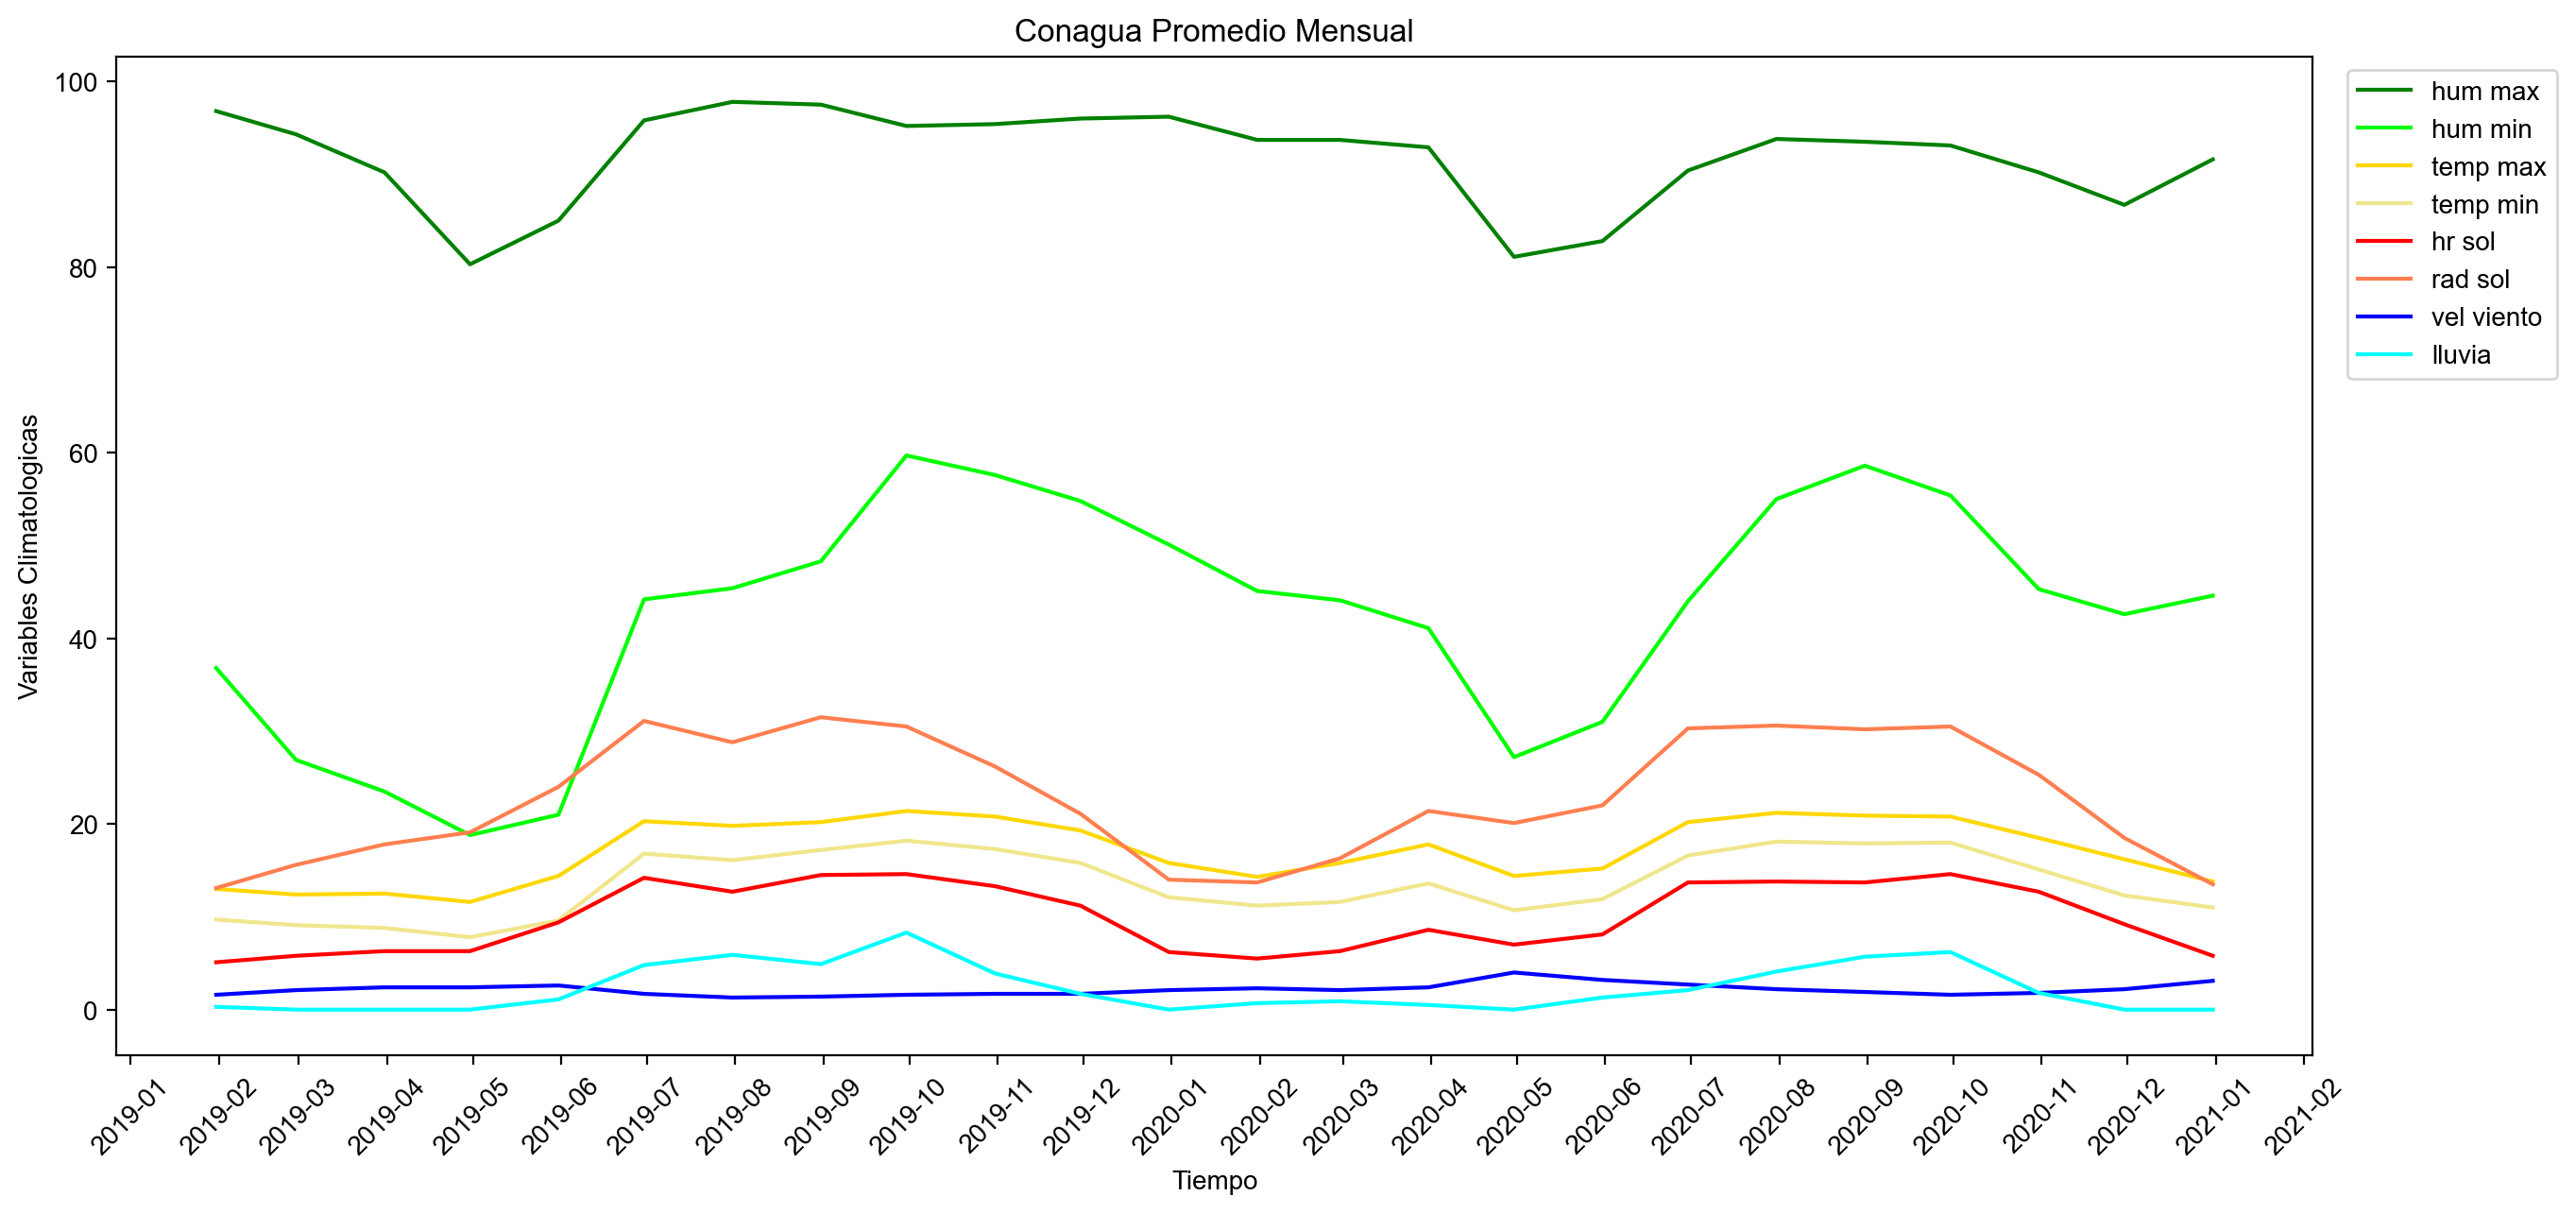

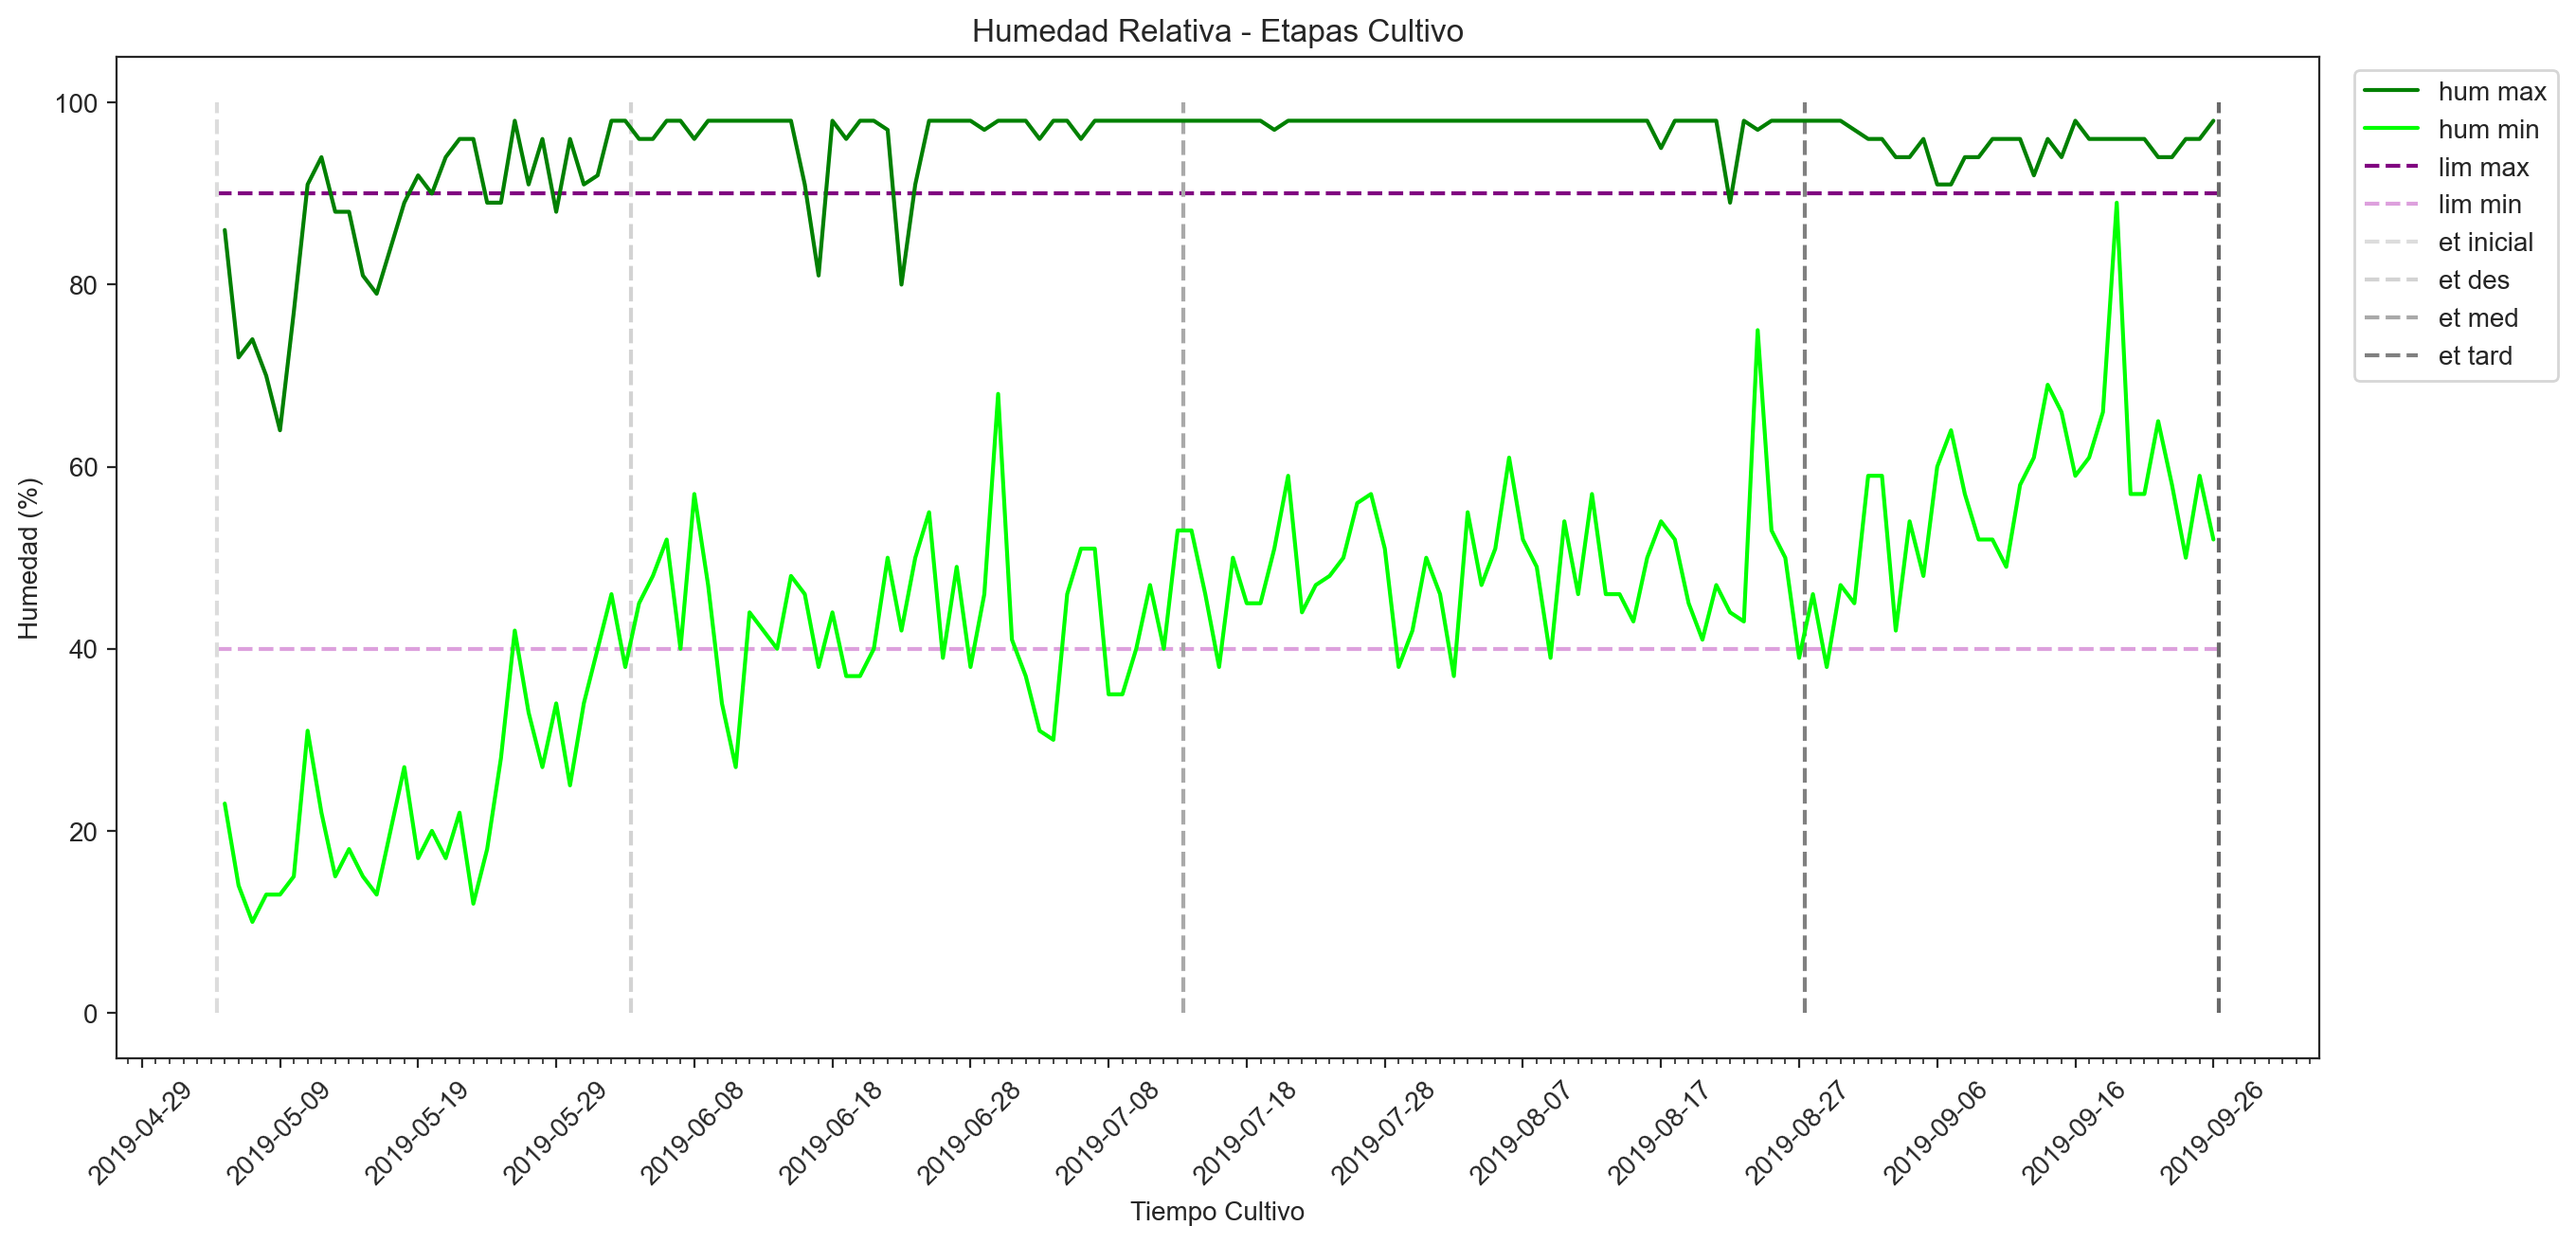

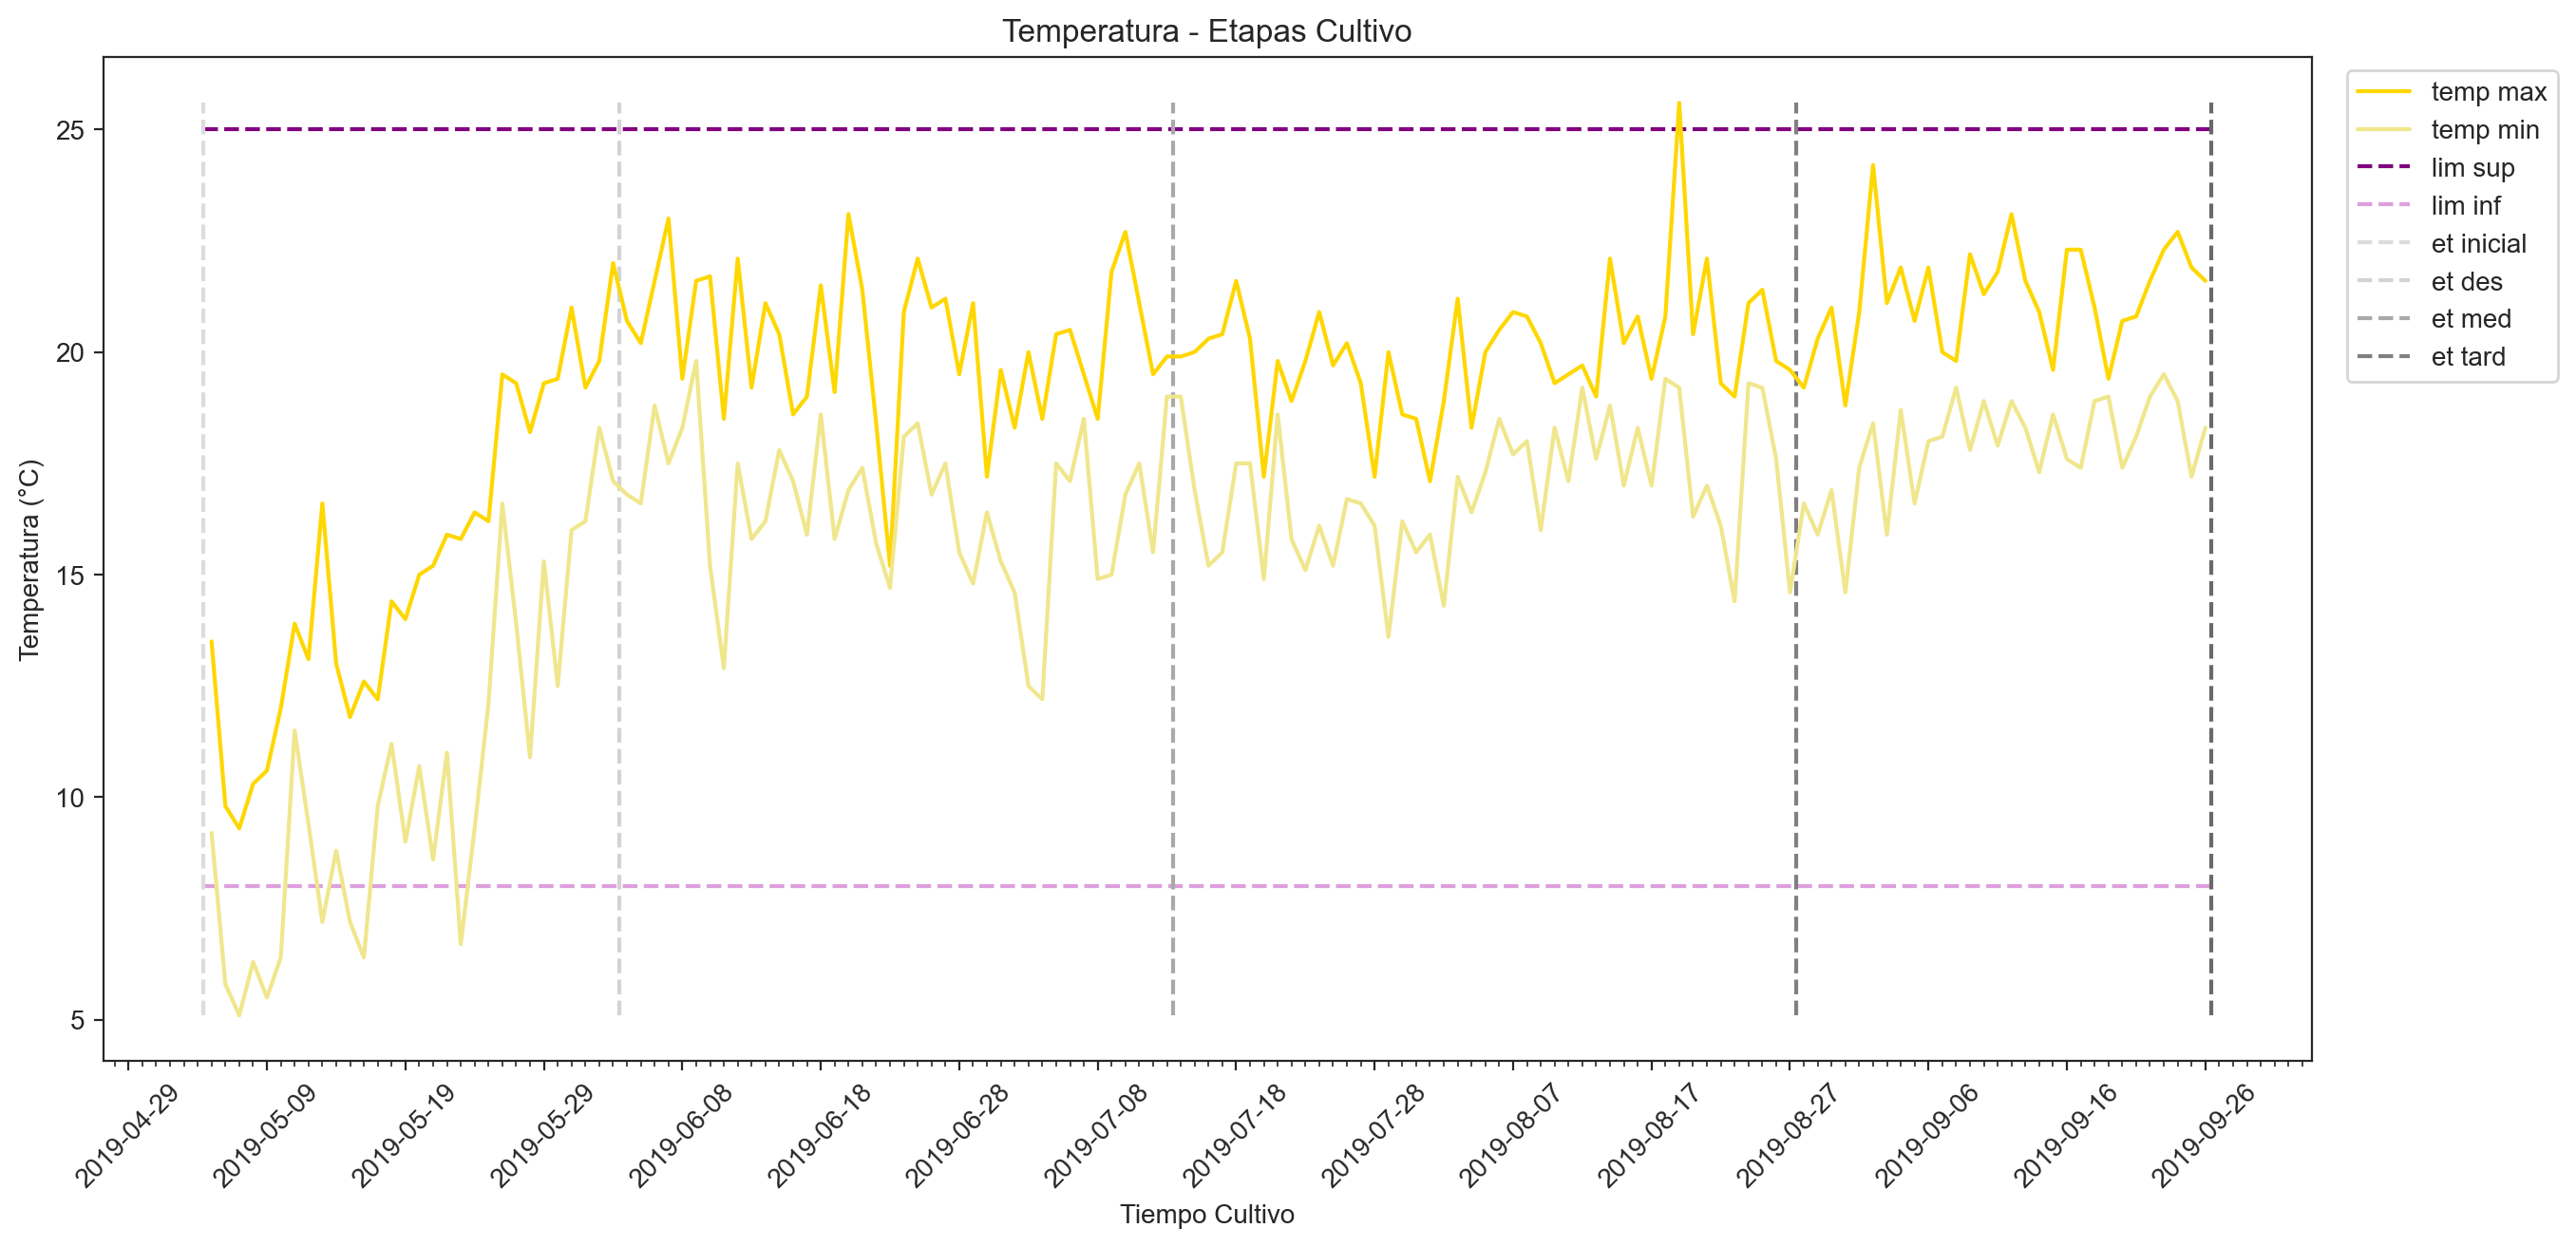

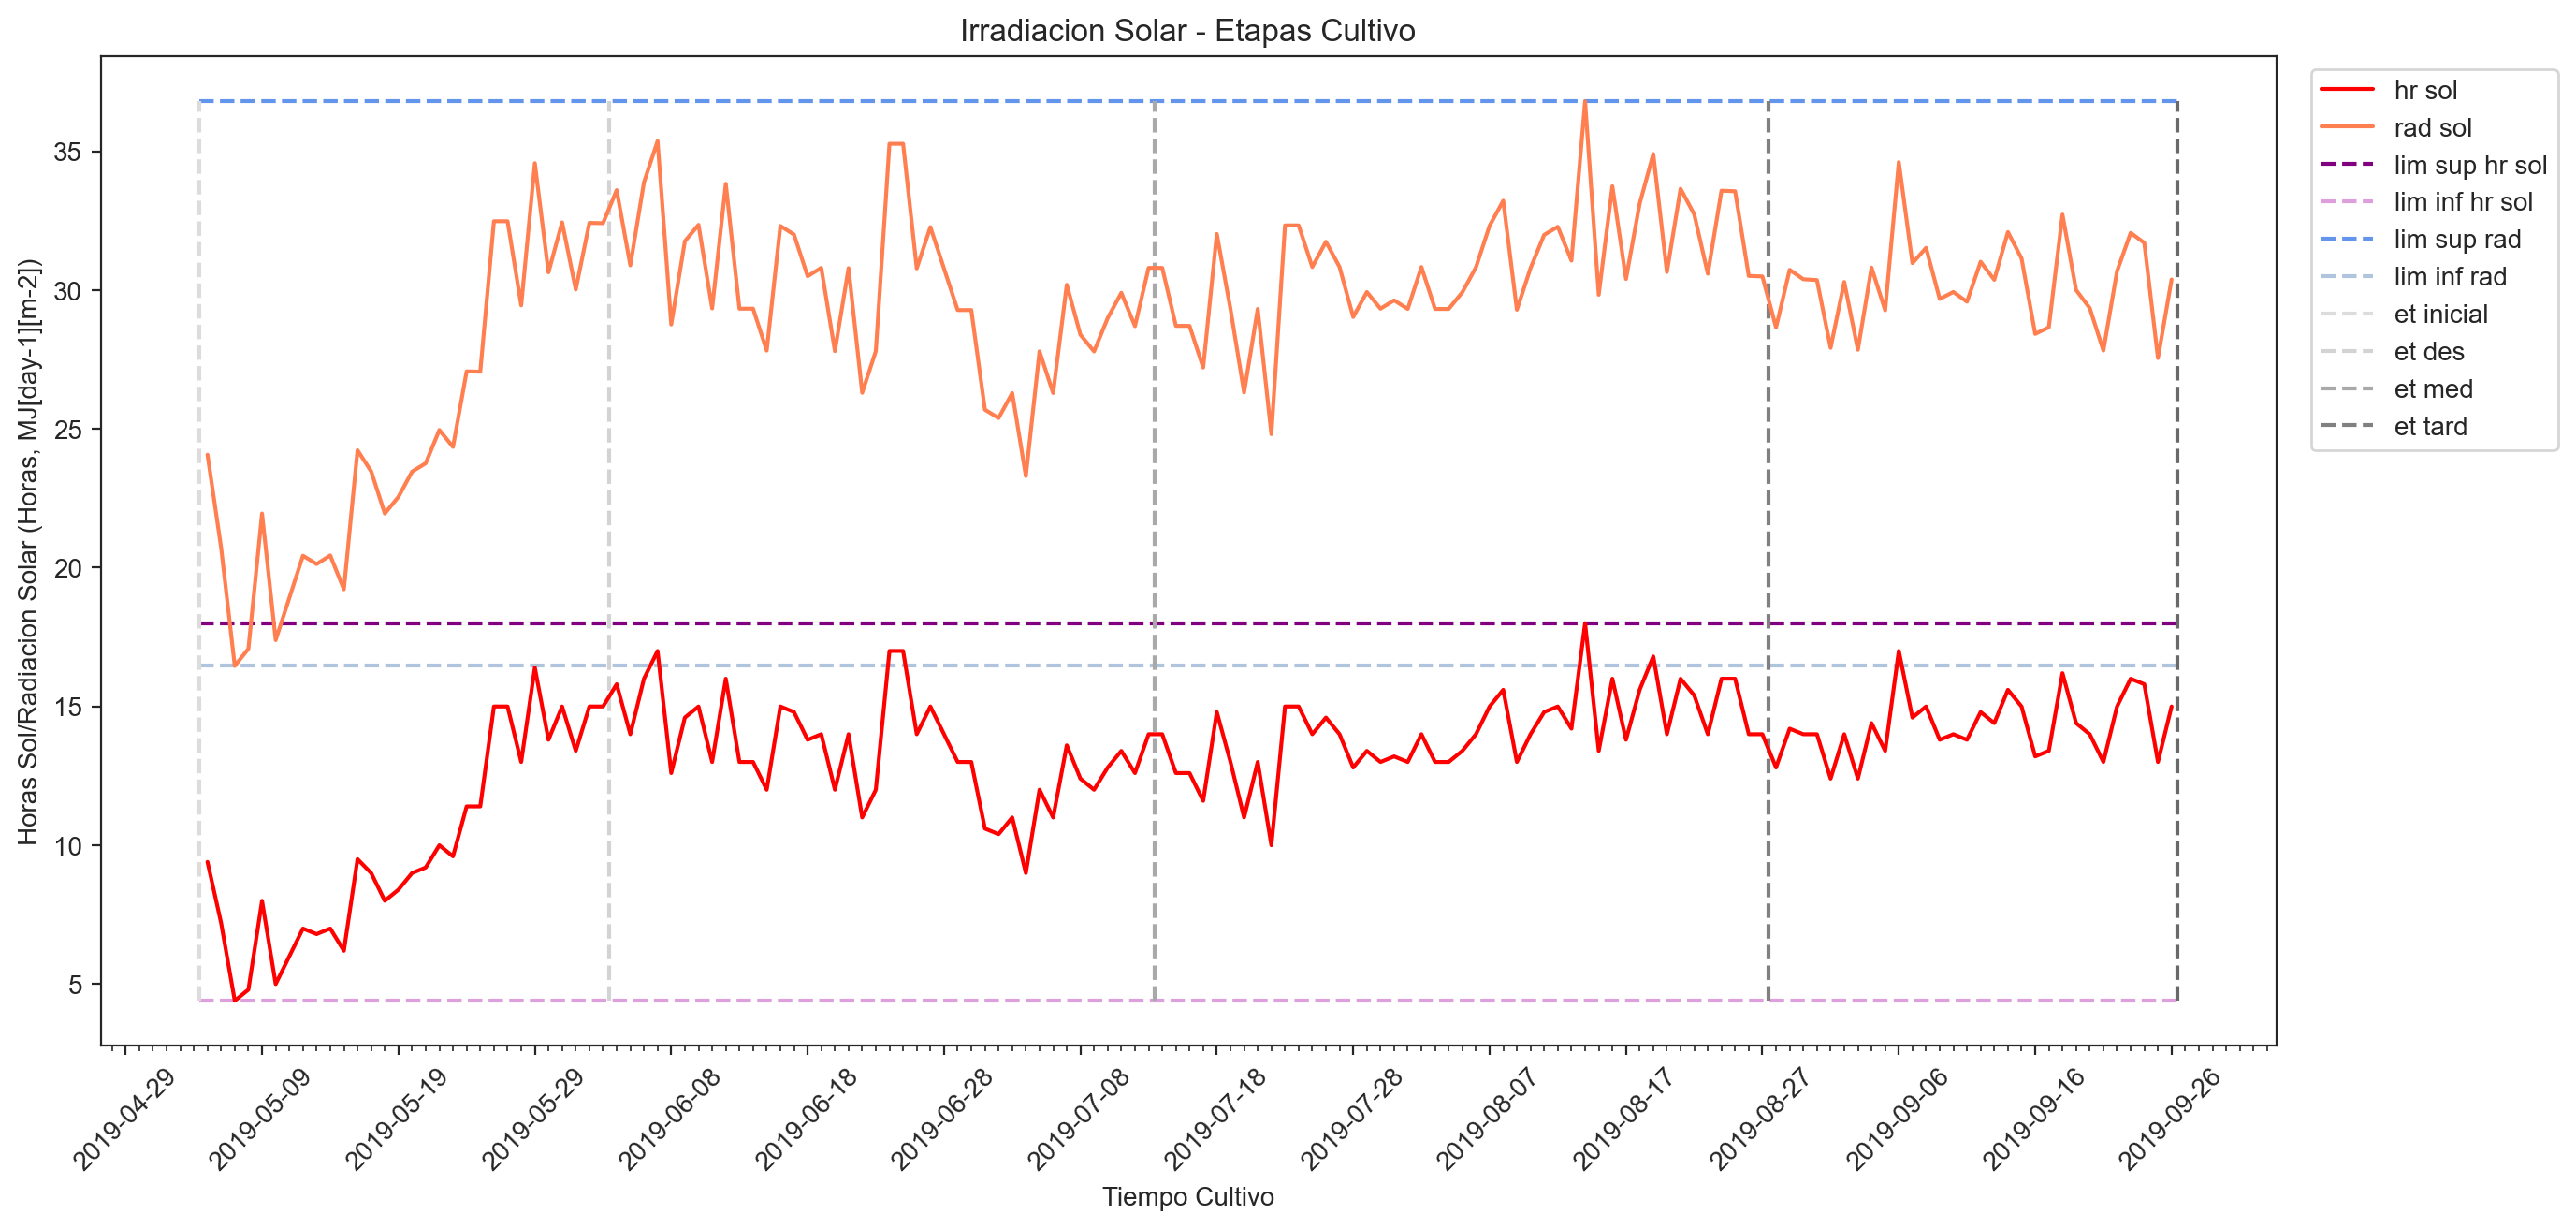

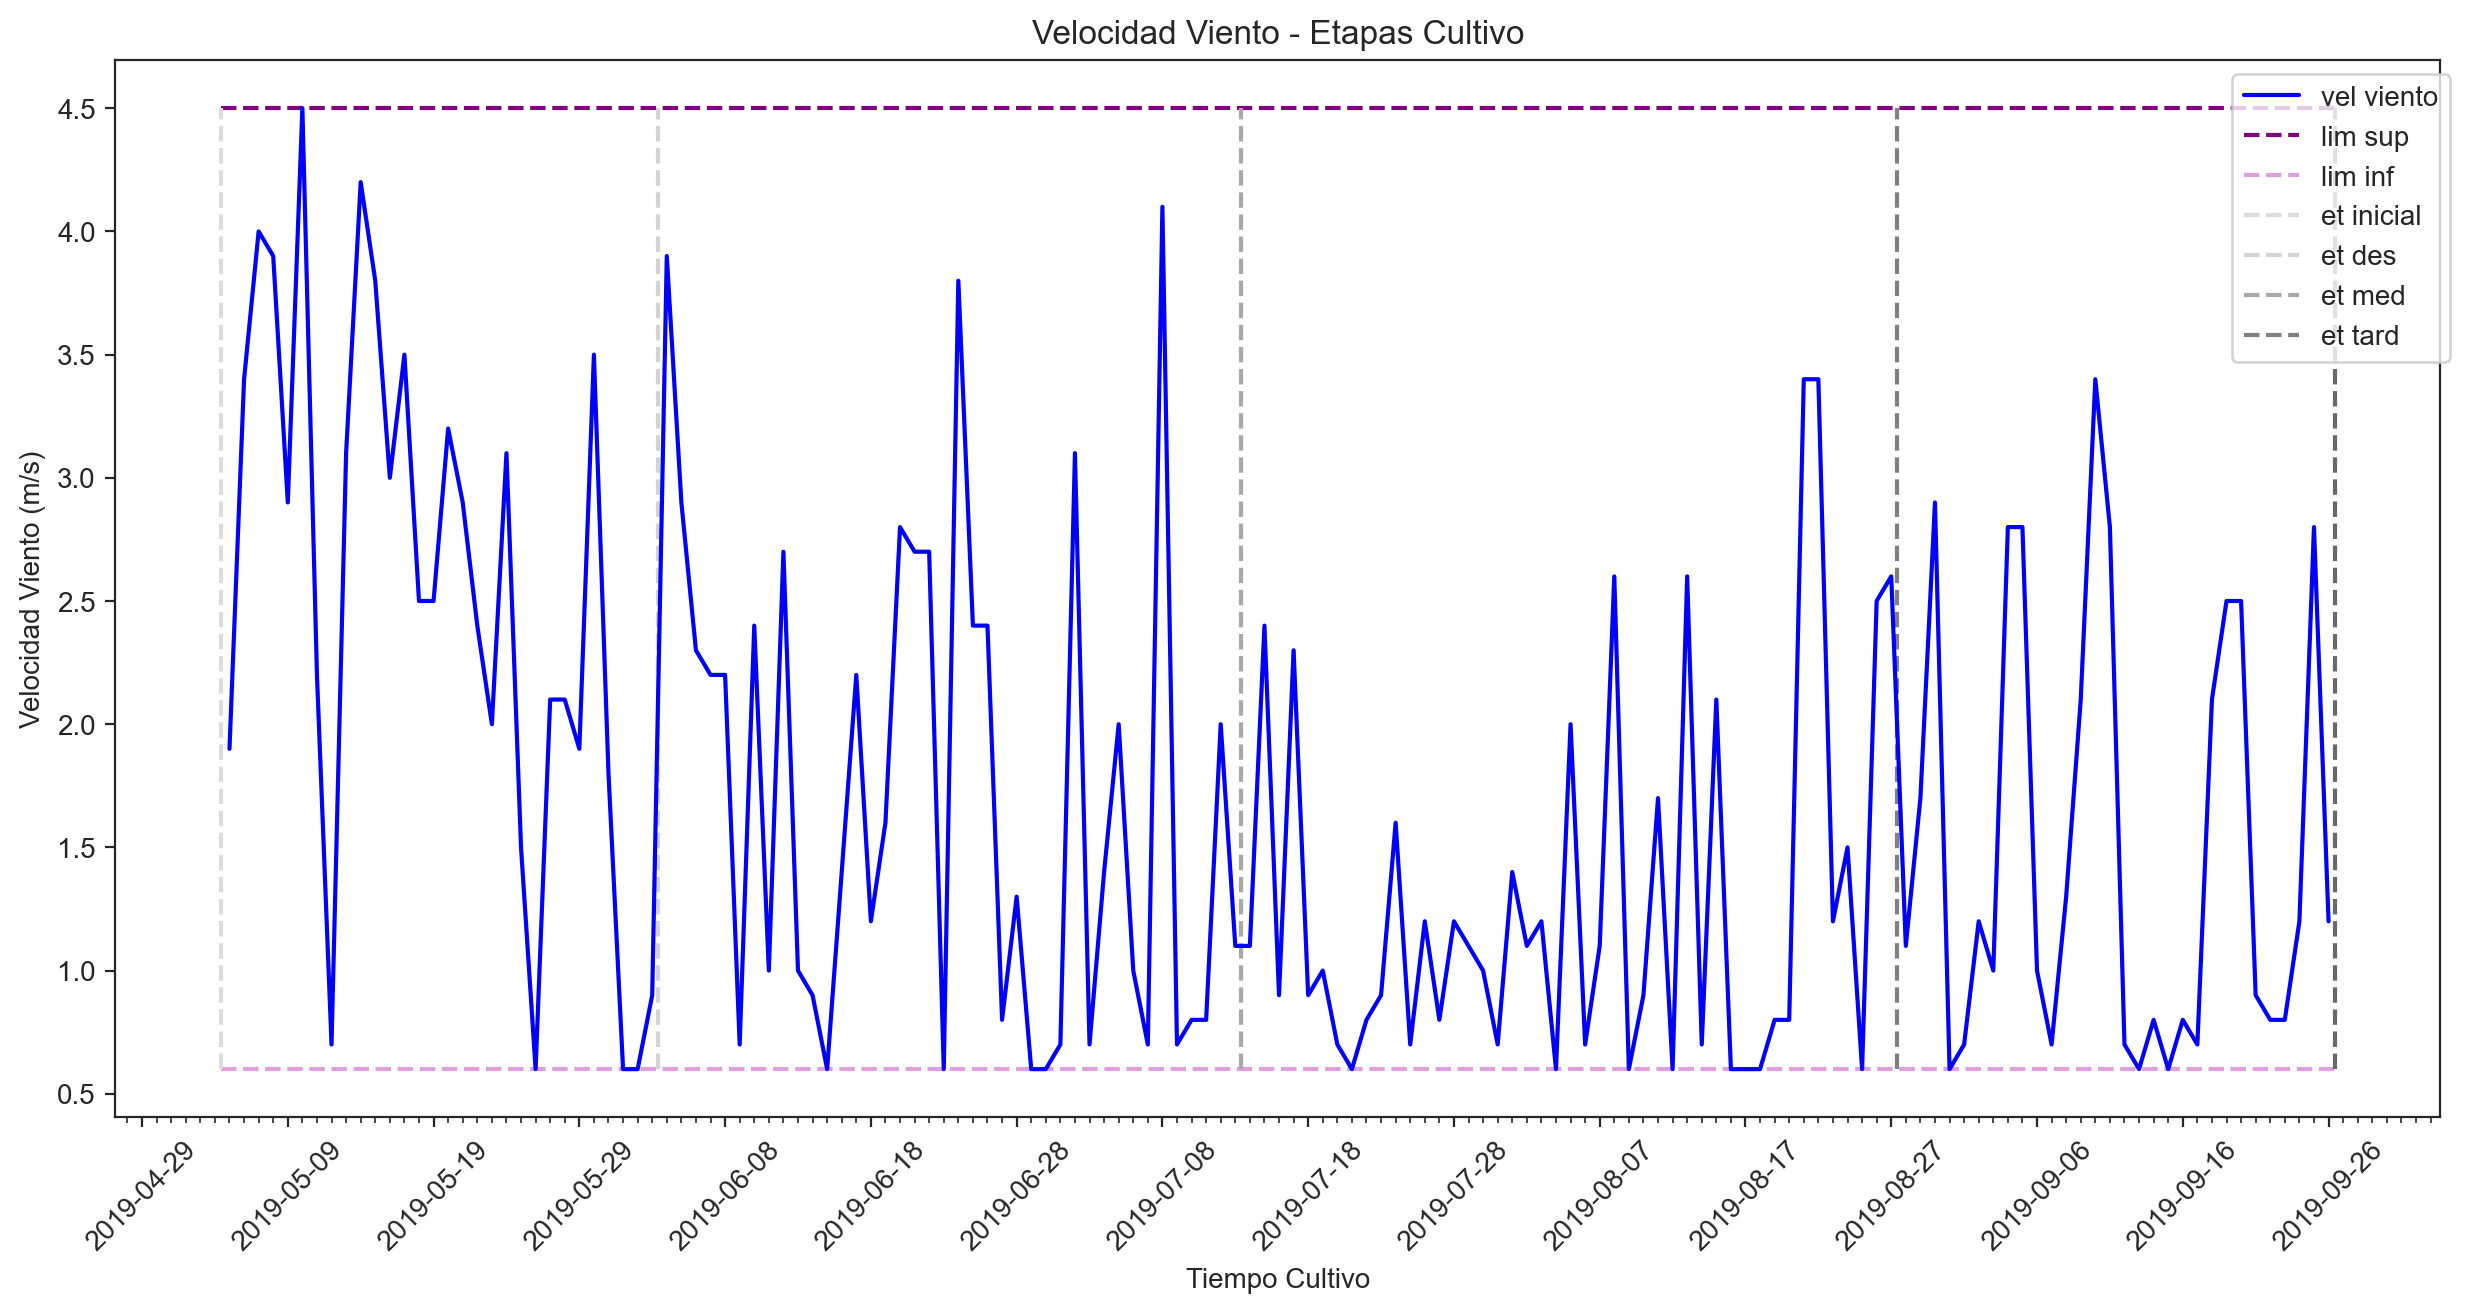

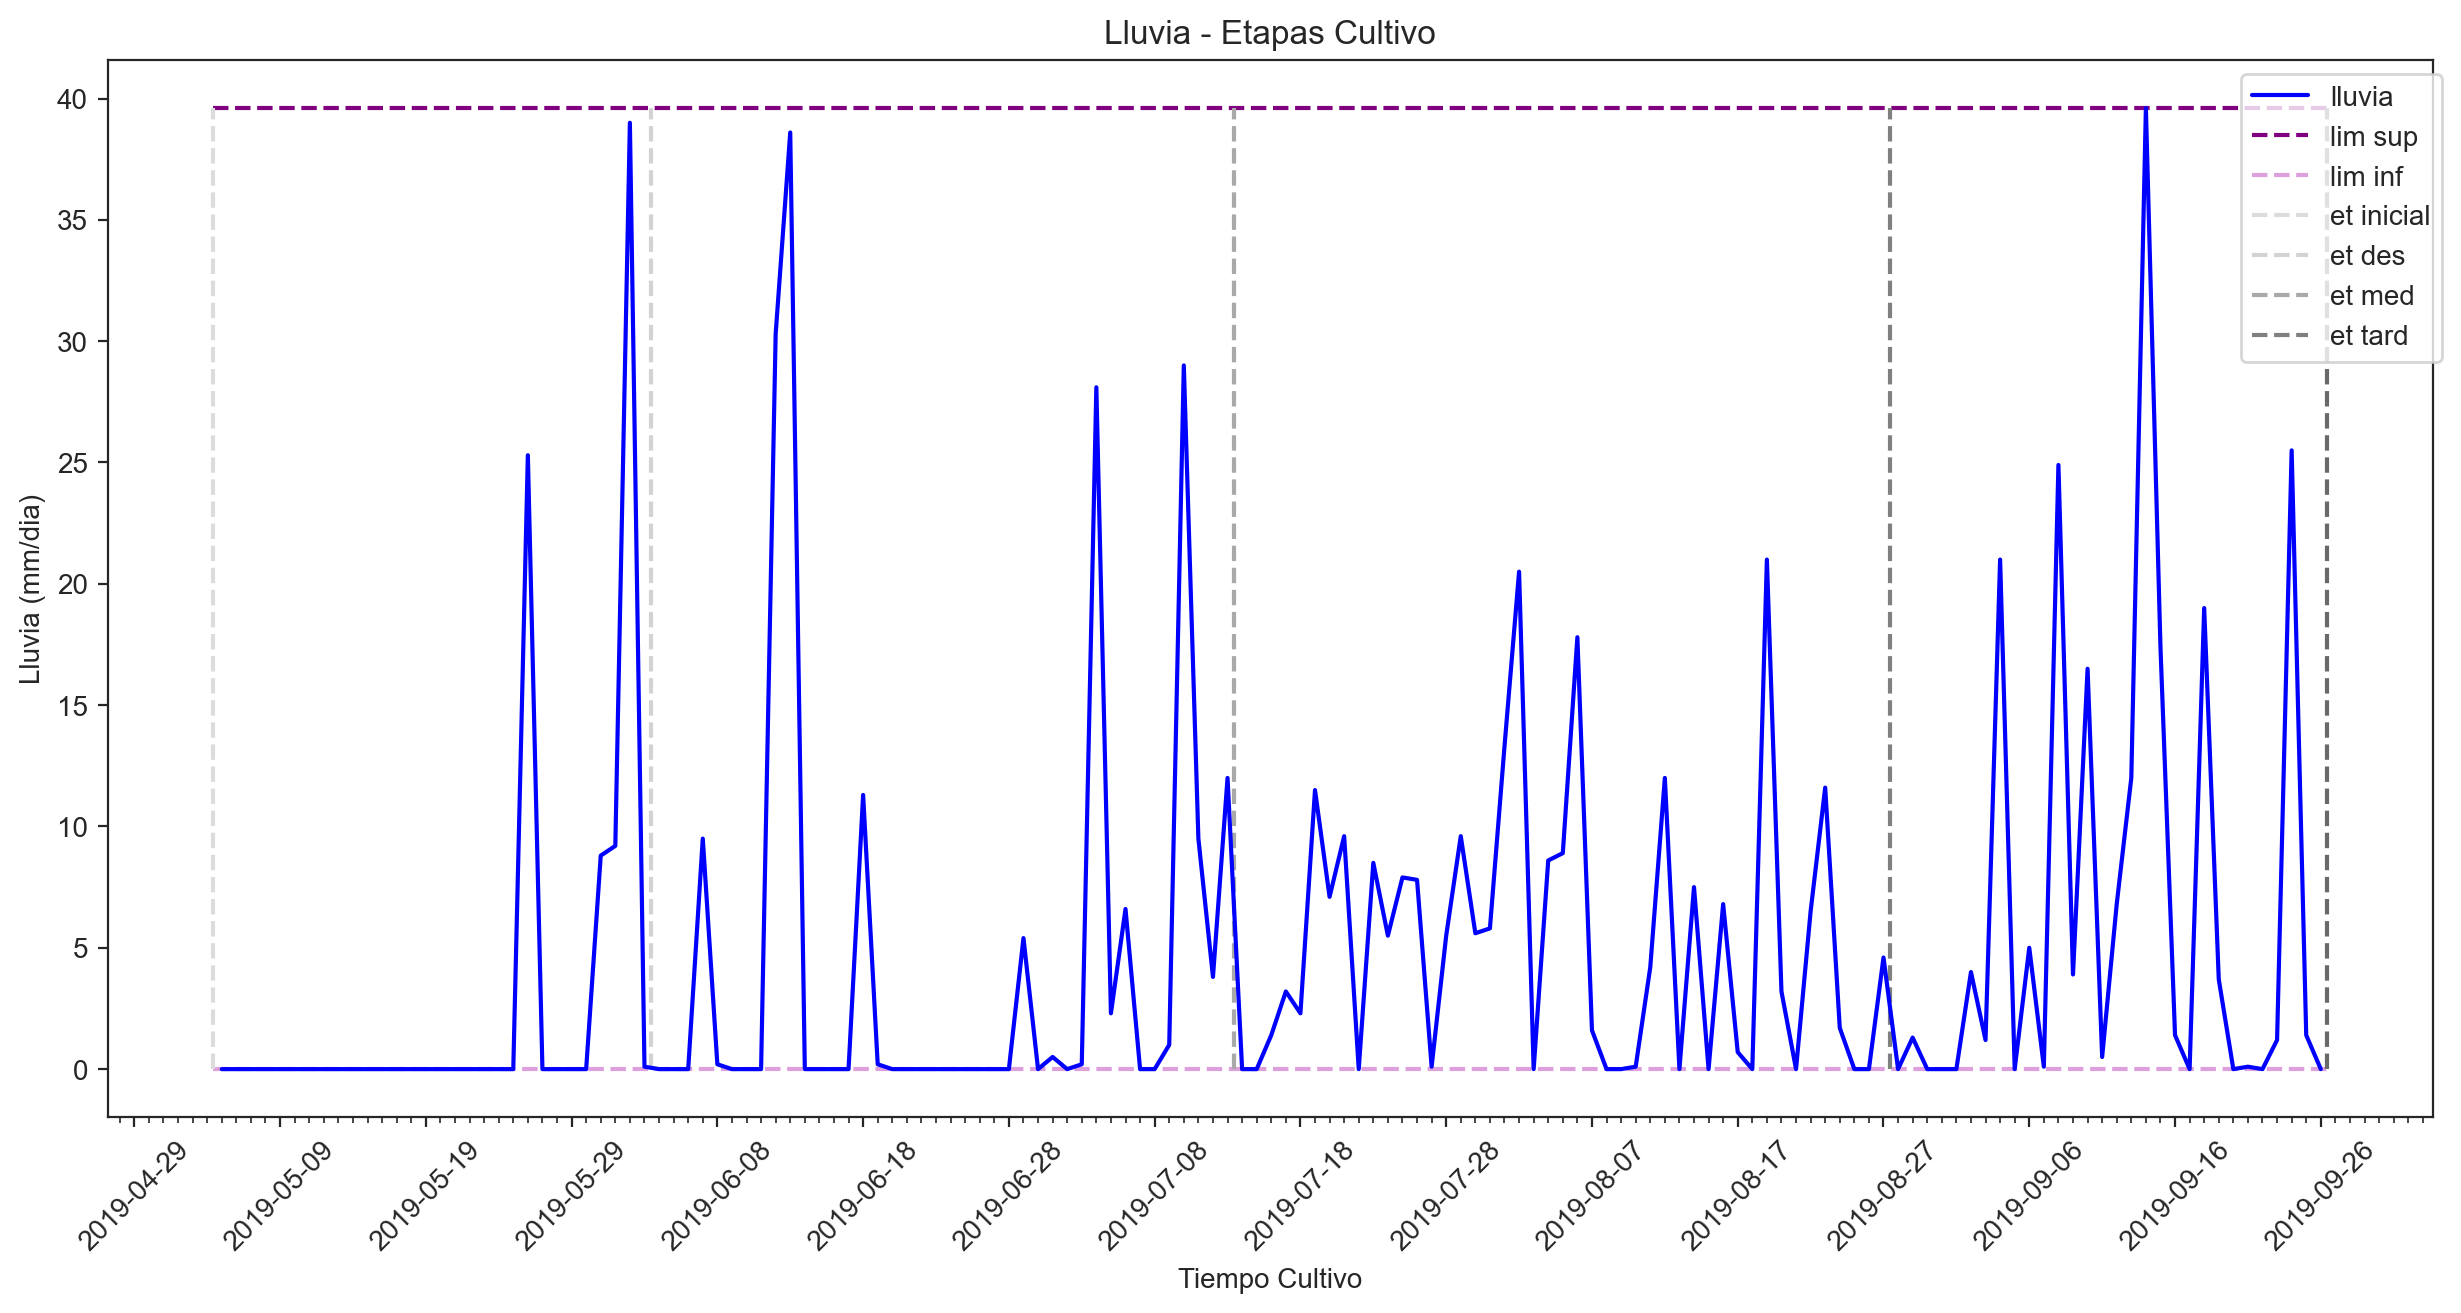

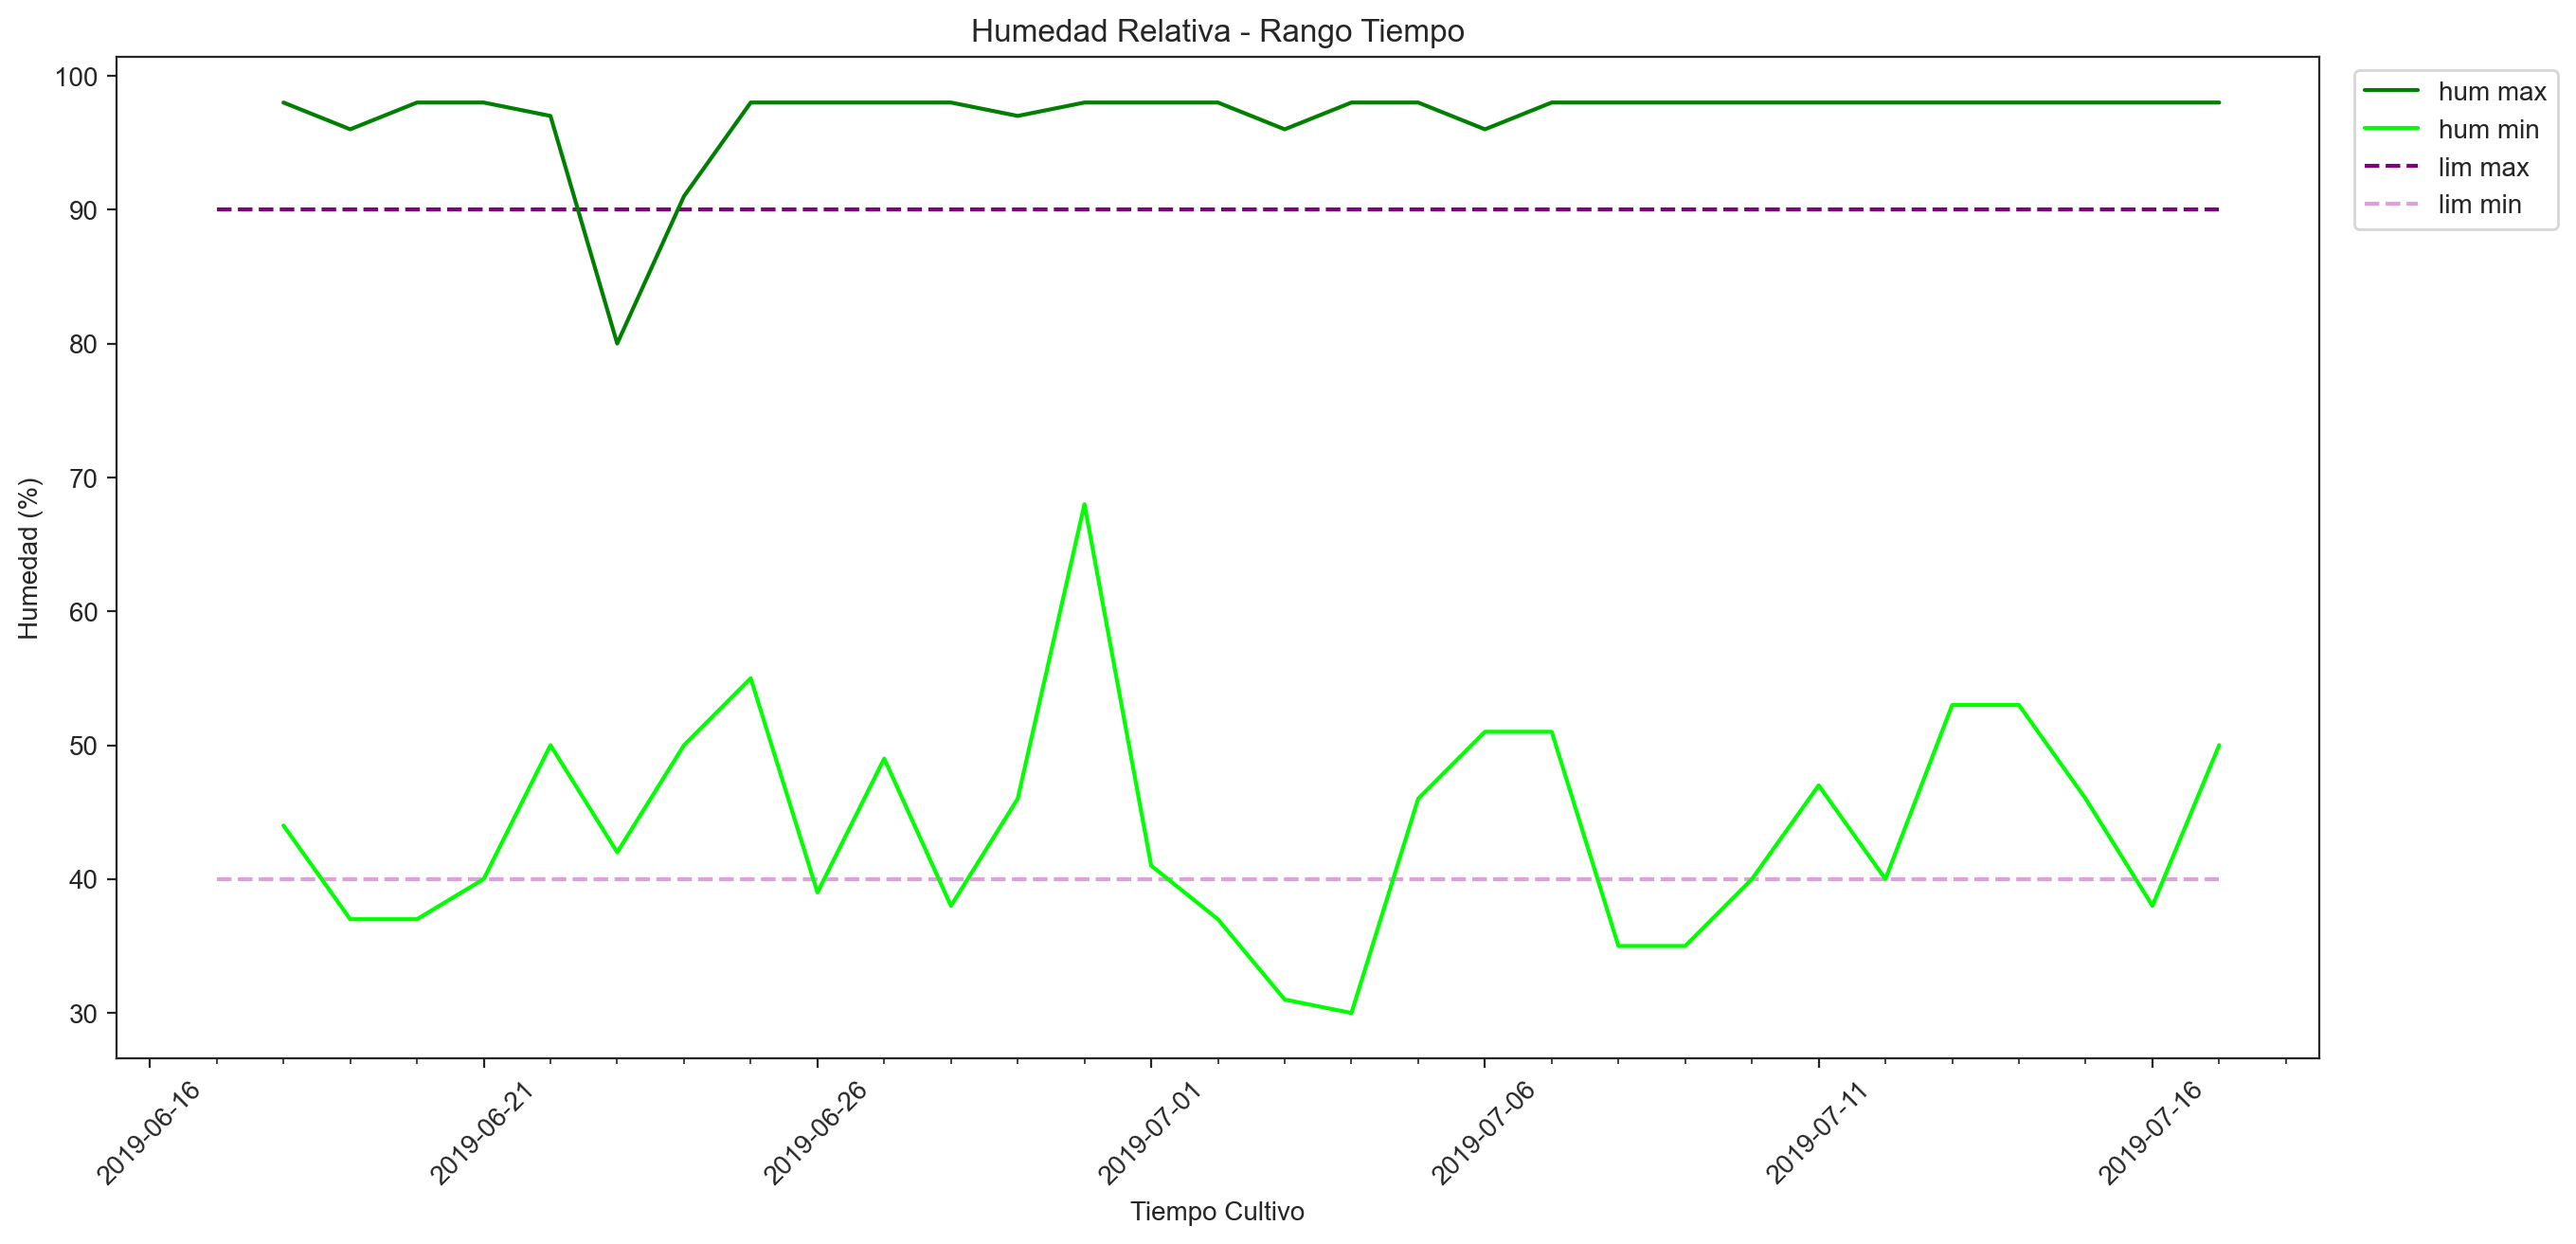

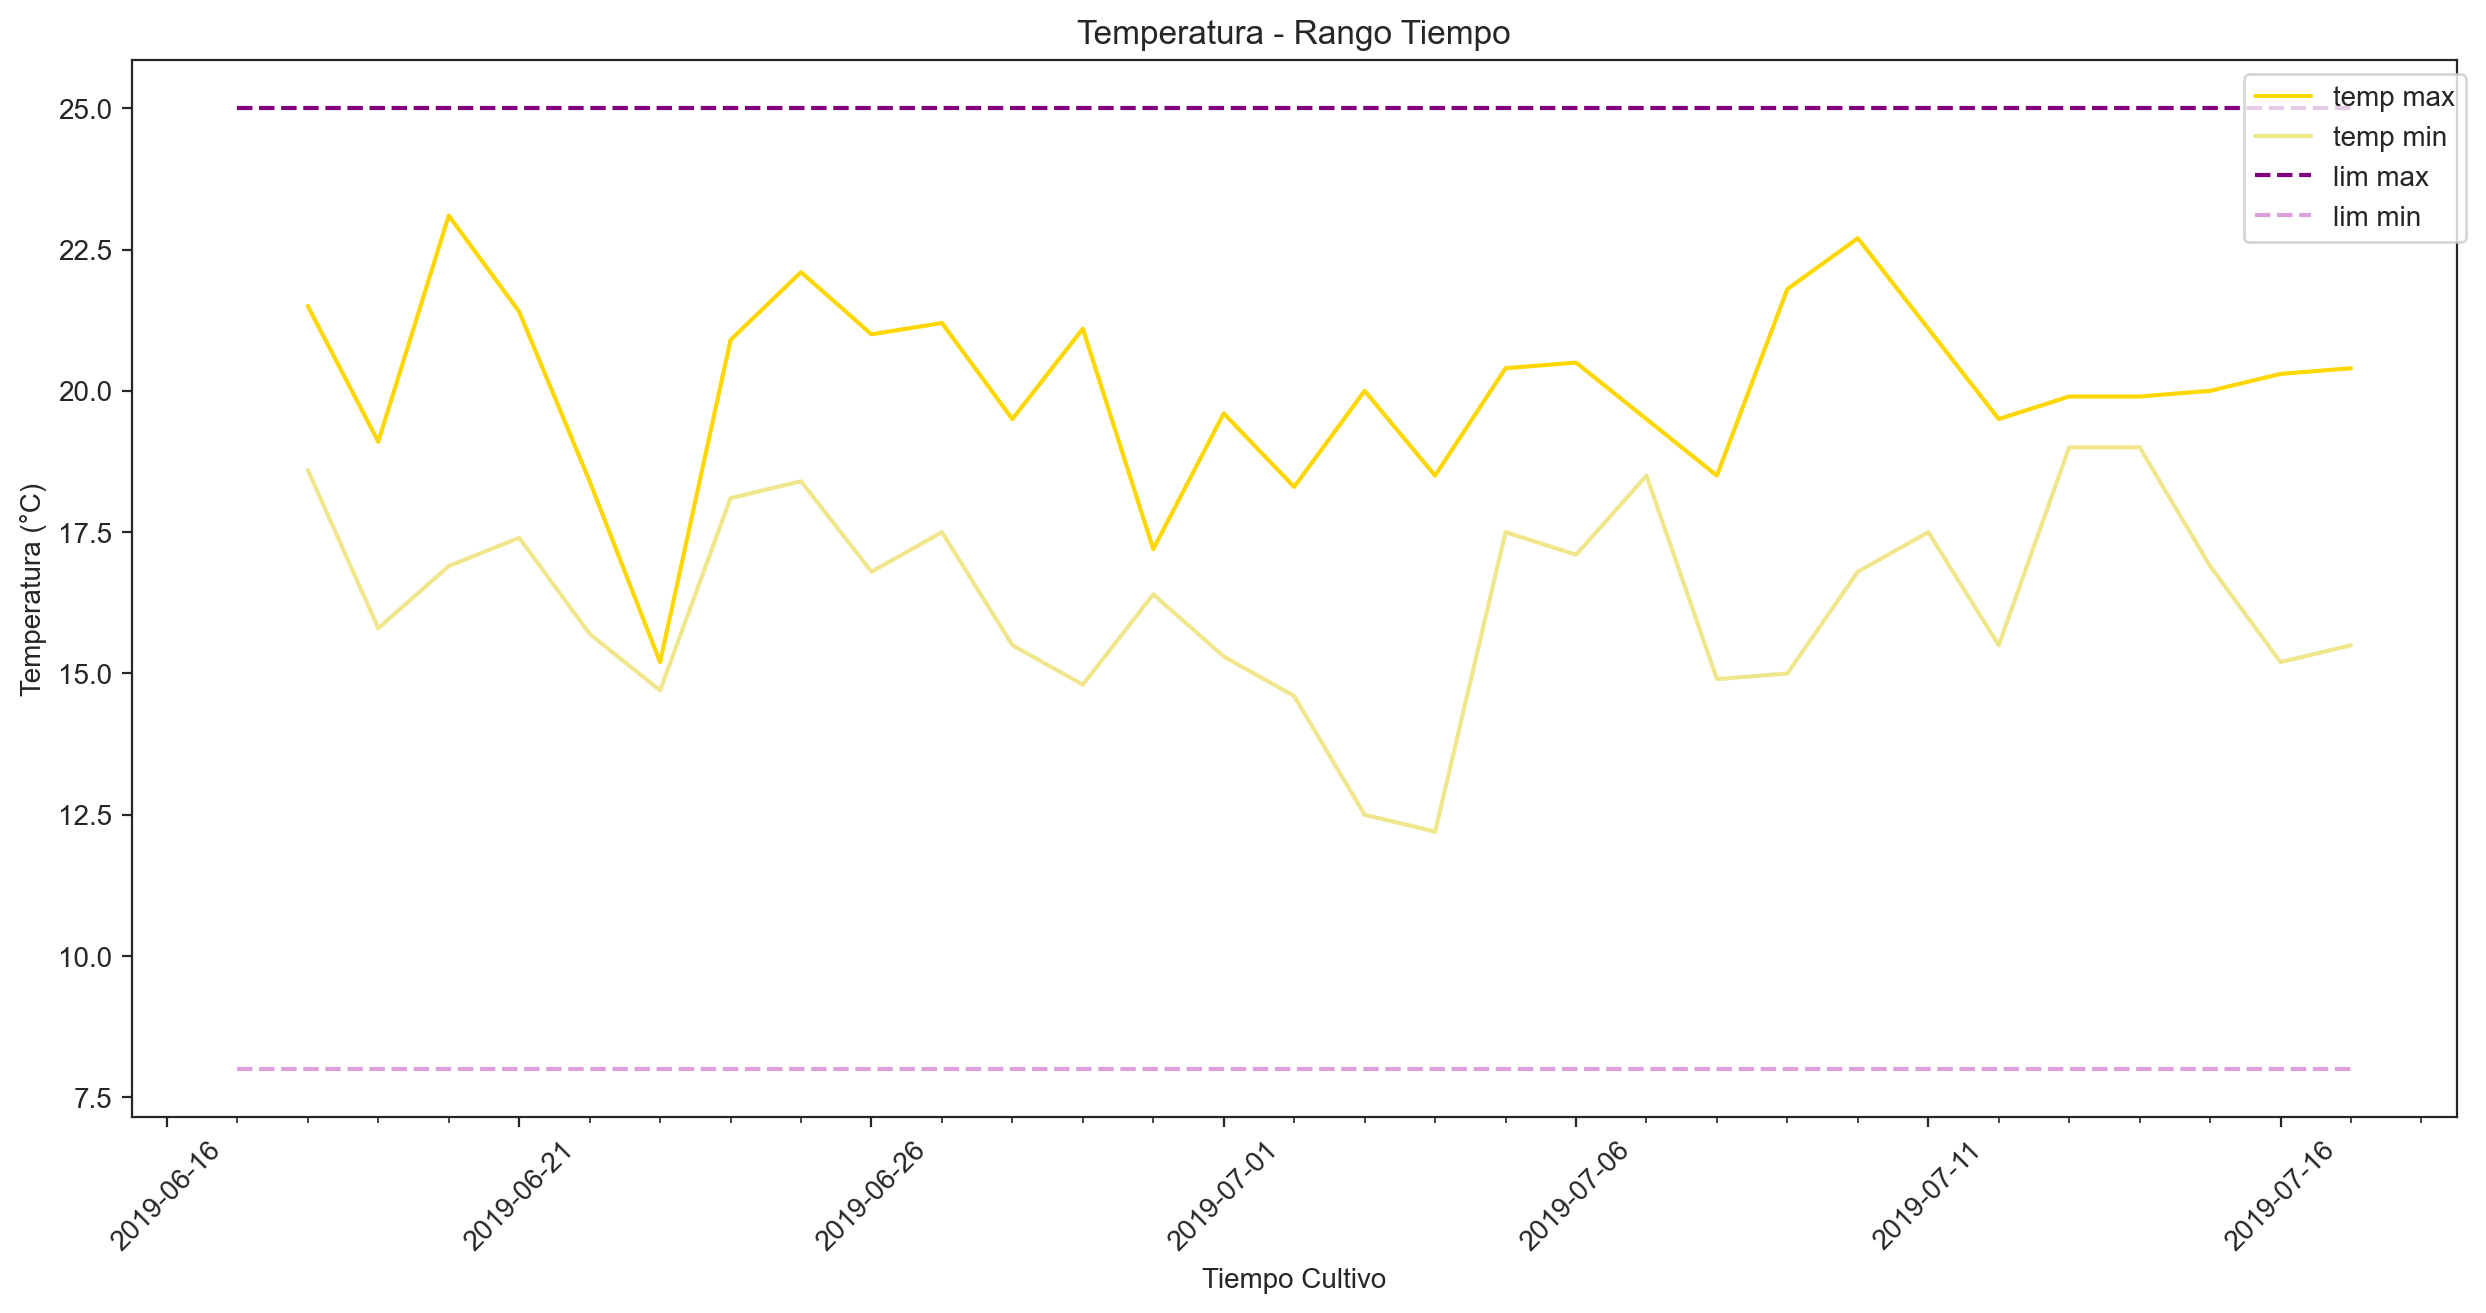

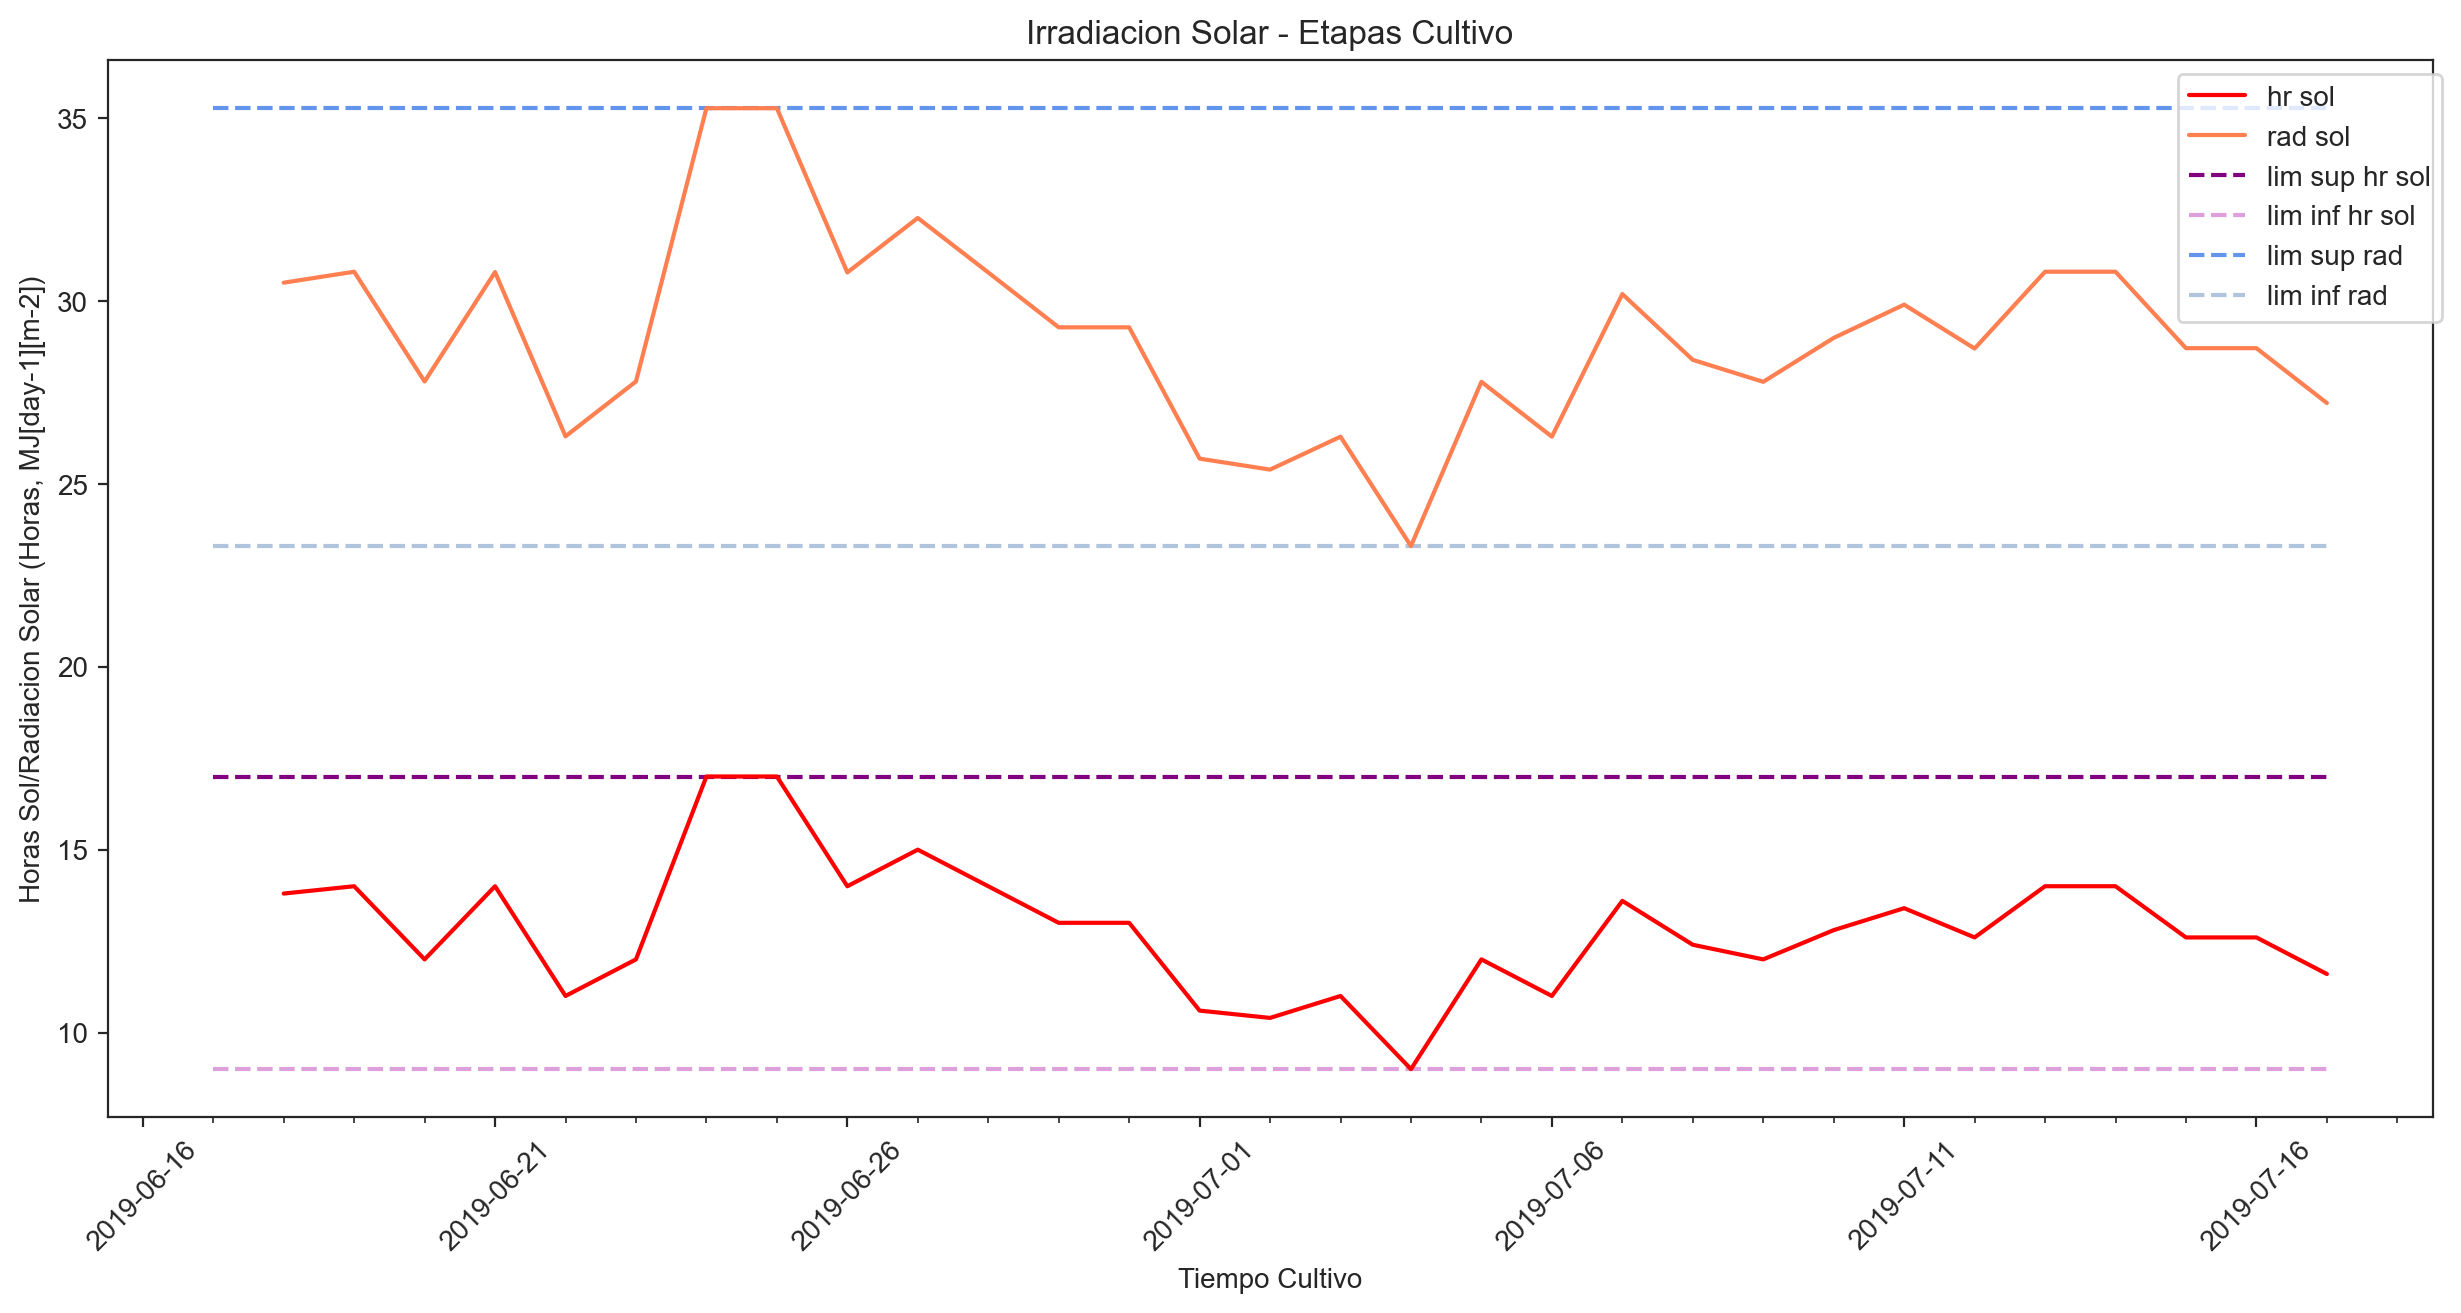

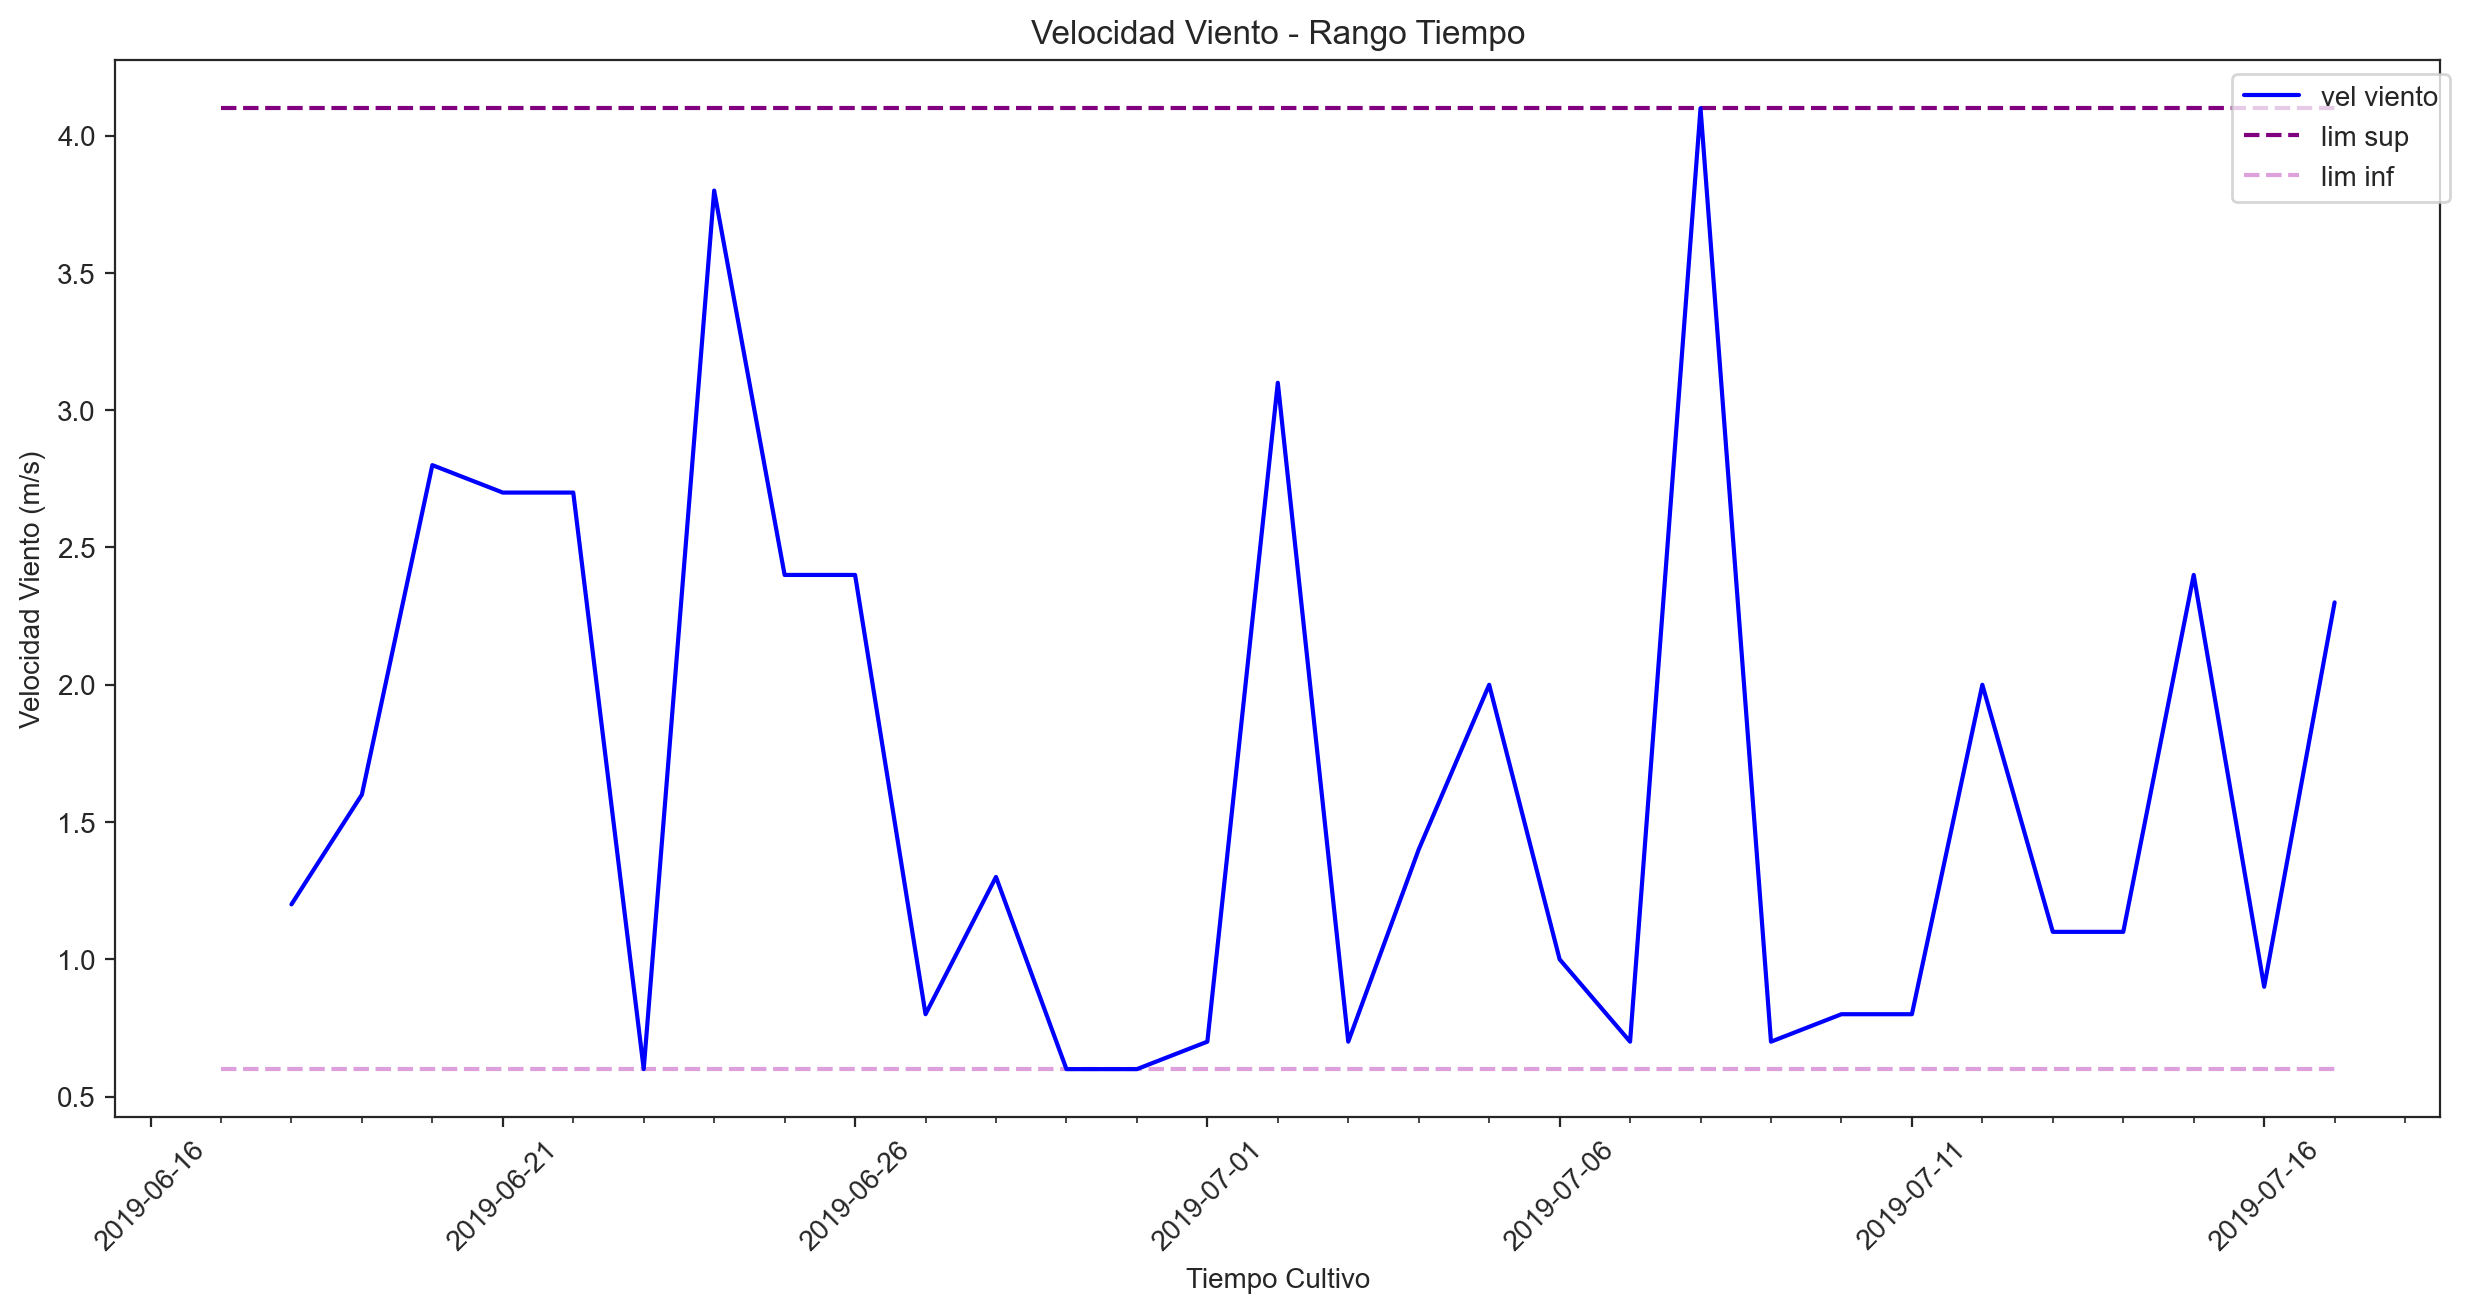

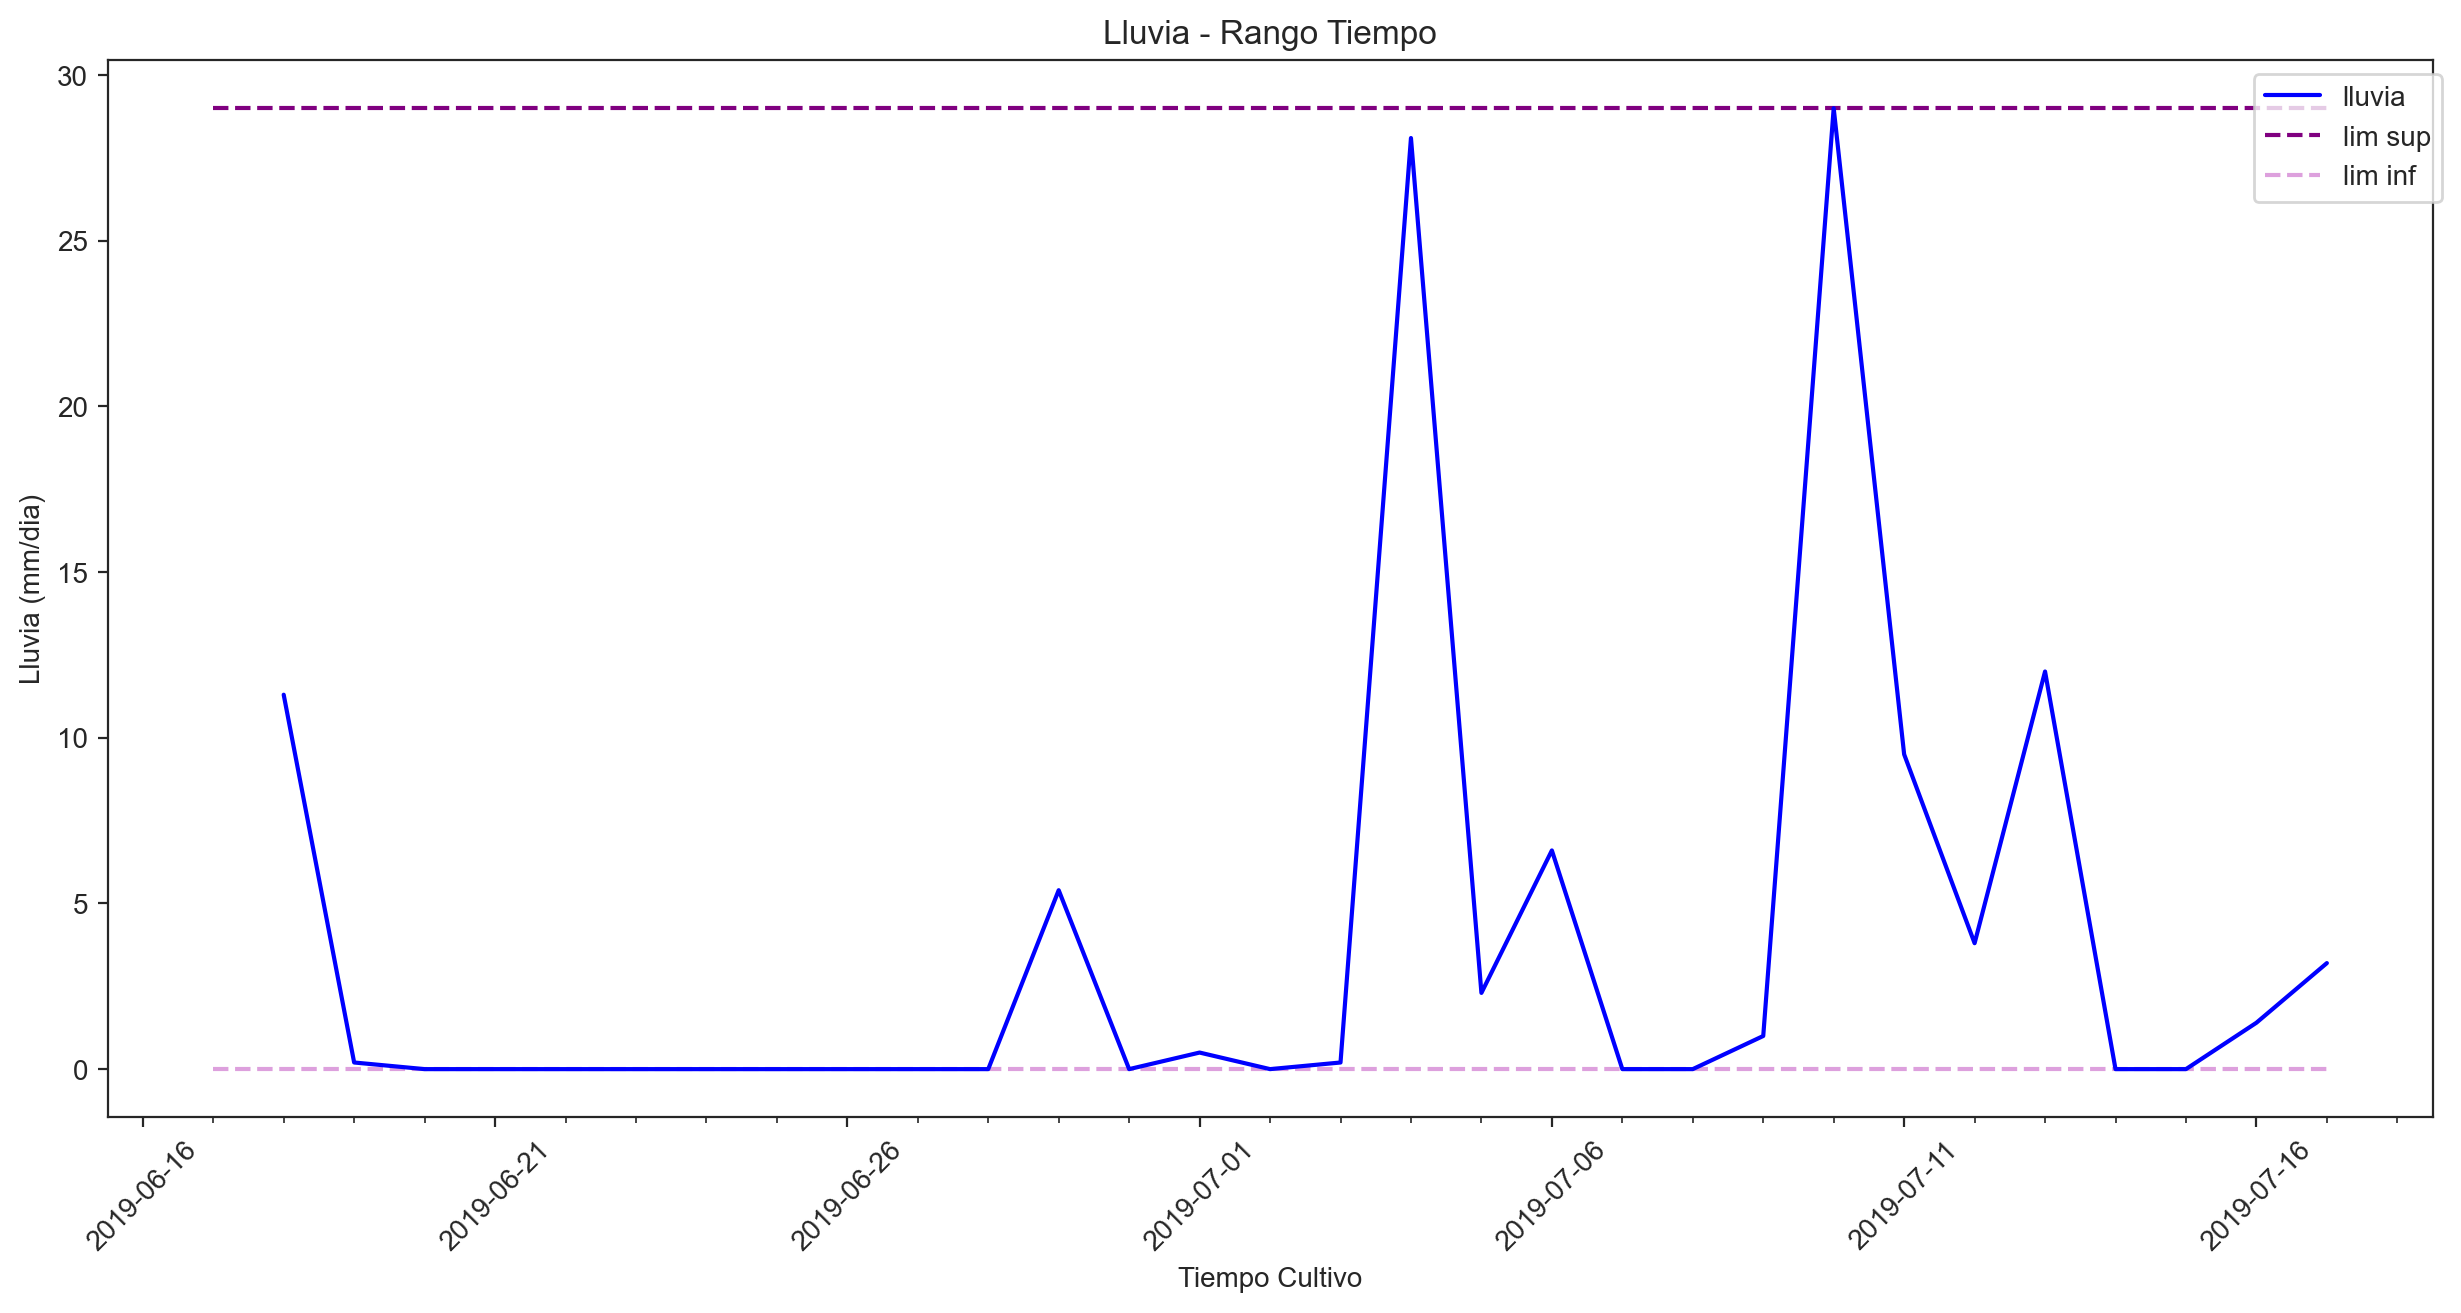

In [15]:
# Definir nombre estacion climatologica
base_station = 'cdguzman'

# Definir el año de inicio y final de nuestros archivos digitales Conagua a explorar
start_year = 2019
end_year = 2020

# Definir el rango de tiempo para visualizar datos climatologicos
# Fecha inicial para visualizacion rango de tiempo
start_timerange_year = 2019
start_timerange_month = 6
start_timerange_day = 17

# Fecha final para visualizacion rango de tiempo
end_timerange_year = 2019
end_timerange_month = 7
end_timerange_day = 17

# Generacion de variable tipo datetime para fecha inicial/final
start_date = datetime(start_timerange_year, start_timerange_month, start_timerange_day)
end_date = datetime(end_timerange_year, end_timerange_month, end_timerange_day)

# Definir fecha de transplante
year = 2019
month = 5
day = 4
hour = 10
minute = 00

# Convertimos fecha de transplante a una variable de tipo datetime
transplant_day = datetime(year, month, day, hour, minute)
# print(trasplant_day)w.fao.org/land-water/databases-and-software/crop-information/tomato/en/
# Definimos las etapas del cultivo de tomate
tomato_days_stage= {
                    "initial":      30,
                    "development":  40,
                    "mid_season":   45,
                    "late_season":  30
}

# Concatenamos los datos conagua seleccionados
conagua_df = concat_conagua_month_(base_station, start_year, end_year)

# Exploracion grafica de los datos conagua de forma promedio-mensual
conagua_average_month_graph(conagua_df)

# Exploracion grafica de humedad, temperatura, radiacion solar y velocidad del viento a lo largo del cultivo
crop_season_humidity_graph(conagua_df,transplant_day,tomato_days_stage)
crop_season_temperature_graph(conagua_df,transplant_day,tomato_days_stage)
crop_season_solar_graph(conagua_df,transplant_day,tomato_days_stage)
crop_season_windspeed_graph(conagua_df,transplant_day,tomato_days_stage)
crop_season_rain_graph(conagua_df,transplant_day, tomato_days_stage)

# Exploration de datos climatologicos por rango de tiempos
timerange_humidity_graph(conagua_df,start_date,end_date)
timerange_temperature_graph(conagua_df,start_date,end_date)
timerange_solar_graph(conagua_df,start_date,end_date)
timerange_windspeed_graph(conagua_df,start_date,end_date)
timerange_rain_graph(conagua_df,start_date,end_date)